In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)  # or 1000
pd.set_option('display.max_rows', None)  # or 1000
pd.set_option('display.max_colwidth', -1)  # or 199

In [2]:
# Global options

sns.set_style("white")
sns.set(font_scale=2, style="ticks")

height=15
aspect=1
x_jitter=0
y_jitter=0

xlim=(5,16)
ylim=(-11, 3.5)

alpha=1
marker='.'
s=1
legend=False
legend_out=False
linewidth=0
x_jitter=0
y_jitter=0
plt.rcParams["figure.figsize"] = (20,20)

In [3]:
def prepare_df(df_path, df_name):

    """Read in information from dataframe"""

    # read in df1
    df = pd.read_csv(df_path, header=0, sep="\t")
    # Mark significants
    df["Significant"]  = "No"
    df.loc[(df["FDR"] < 0.05), "Significant"] = "FDR<0.05"
    # set id as index
    df.set_index("id", inplace=True)
    # rename columns
    df.columns = df.columns + "_" + df_name
    # reset index
    df.reset_index(inplace=True)

    return df

In [4]:
def plot_MA_s(df, df_name):

    """Plot MA"""
    sns_plot = sns.lmplot(x=f"logCPM_{df_name}",
                          y=f"logFC_{df_name}",
                          data=df,
                          fit_reg=False,
                          hue=f"Significant_{df_name}",
                          hue_order=["No", "FDR<0.05"],
                          palette=["black", "blue"],
                          scatter_kws={'alpha':alpha},
                          height=height,
                          aspect=aspect,
                          x_jitter=x_jitter,
                          y_jitter=y_jitter,
                          markers=marker,
                          legend=legend,
                          legend_out=legend_out)
    sns_plot = plt.gca()
    sns_plot.set_title(f"MA plot for {df_name}")
    sns_plot.spines['right'].set_visible(True)
    sns_plot.spines['top'].set_visible(True)
#     sns_plot.set(xlim=xlim, ylim=ylim)
    
    plt.savefig(f"{df_name}.pdf")

In [5]:
def plot_MA(df, df_name):

    """Plot MA"""
    sns_plot = sns.lmplot(x=f"logCPM_{df_name}",
                          y=f"logFC_{df_name}",
                          data=df,
                          fit_reg=False,
                          hue=f"Significant_{df_name}",
                          hue_order=["No", "FDR<0.05"],
                          palette=["black", "blue"],
                          scatter_kws={'alpha':alpha},
                          height=height,
                          aspect=aspect,
                          x_jitter=x_jitter,
                          y_jitter=y_jitter,
                          markers=marker,
                          legend=legend,
                          legend_out=legend_out)
    sns_plot = plt.gca()
    sns_plot.set_title(f"MA plot for {df_name}")
    sns_plot.spines['right'].set_visible(True)
    sns_plot.spines['top'].set_visible(True)
    sns_plot.set(xlim=xlim, ylim=ylim)
    
    plt.savefig(f"{df_name}.pdf")

In [6]:
def merge_df(df_1, df_2):
    
    """Merge dataframes"""
    
    df = pd.merge(df_1, df_2, on="id", how="right")
    df["Significant"] = "No"
    return df

In [7]:
def compare(df_1_path, df_2_path, df_1_name, df_2_name):
    
    "Combine multiple functions"
    
    df_1 = prepare_df(df_1_path, df_1_name)
    plot_MA_s(df_1, df_1_name)
    df_2 = prepare_df(df_2_path, df_2_name)
    plot_MA(df_2, df_2_name)
    
    df_merged = merge_df(df_1, df_2)
    
#     plot_FC_correlation(df_merged, df_1_name, df_2_name, hue="Significant")
#     plot_FC_correlation(df_merged, df_1_name, df_2_name, hue="Significant_" + df_1_name)
#     plot_FC_correlation(df_merged, df_1_name, df_2_name, hue="Significant_" + df_2_name)
    
    return df_merged

In [8]:
def plot_merged_MA_plot(df_1_path, df_2_path, df_1_name, df_2_name):

    df_all = compare(df_1_path, df_2_path, df_1_name, df_2_name)

    df_all["Significant"] = "No"

    df_all.loc[(df_all[f"FDR_{df_2_name}"]<0.05), "Significant"] = f"FDR_{df_2_name}<0.05"

    df_all.loc[(df_all[f"FDR_{df_2_name}"]<0.05) &
               (df_all[f"FDR_{df_1_name}"]<0.05) &
               (df_all[f"logFC_{df_1_name}"]>0) &
               (df_all[f"logFC_{df_2_name}"]>0),
                "Significant"] = f"FDR_{df_2_name}<0.05\nFDR_{df_1_name}<0.05\nlogFC_{df_1_name}>0\nlogFC_{df_2_name}>0)"
    
    df_all.loc[(df_all[f"FDR_{df_2_name}"]<0.05) &
               (df_all[f"FDR_{df_1_name}"]<0.05) &
               (df_all[f"logFC_{df_1_name}"]>0) &
               (df_all[f"logFC_{df_2_name}"]<0),
                "Significant"] = f"FDR_{df_2_name}<0.05\nFDR_{df_1_name}<0.05\nlogFC_{df_1_name}>0\nlogFC_{df_2_name}<0)"
    print("Significant details:")
    print(pd.DataFrame(df_all["Significant"].value_counts()))
    
    df_all.loc[(df_all[f"FDR_{df_2_name}"]<0.05) &
               (df_all[f"FDR_{df_1_name}"]<0.05) &
               (df_all[f"logFC_{df_1_name}"]>0),
                "Significant"] = f"FDR_{df_2_name}<0.05\nFDR_{df_1_name}<0.05\nlogFC_{df_1_name}>0)"

    print("\n\nSignificant:")
    print(pd.DataFrame(df_all["Significant"].value_counts()))


    sns_plot = sns.lmplot(x=f"logCPM_{df_2_name}",
                          y=f"logFC_{df_2_name}",
                          data=df_all,
                          fit_reg=False,
                          hue=f"Significant",
                          hue_order=["No", f"FDR_{df_2_name}<0.05", f"FDR_{df_2_name}<0.05\nFDR_{df_1_name}<0.05\nlogFC_{df_1_name}>0)"],
                          palette=["black", "blue", "red"],
                          scatter_kws={'alpha':alpha},
                          height=height,
                          aspect=aspect,
                          x_jitter=x_jitter,
                          y_jitter=y_jitter,
                          markers=marker,
                          legend=legend,
                          legend_out = legend_out)


    sns_plot = plt.gca()
    sns_plot.set_title(f"MA plot")
    sns_plot.spines['right'].set_visible(True)
    sns_plot.spines['top'].set_visible(True)
    sns_plot.set(xlim=xlim, ylim=ylim)
    
    plt.savefig(f"{df_2_name}__{df_1_name}.pdf")

In [9]:
# Input prefix
small_rna_prefix = "../../01_small_RNA_seq_15_C/results/filter/DE_htseq_count__1_alignment_per_read__reverse__"

ips_prefix = "../../03_WAGO_IPs/results/filter/DE_htseq_count__1_alignment_per_read__reverse__"

csr1_ip_prefix = "../../04_csr_1_IP/results/filter/DE_htseq_count__1_alignment_per_read__reverse__"

In [10]:
suffix = "/DE_edgeR/final_table_with_gene_info.tsv"

In [11]:
# Input files

# small_RNAs
small_rna__WT__Dpf_3_null_path = small_rna_prefix + "WT__Dpf_3_null" + suffix
small_rna__WT__Dpf_3_null_name = "Dpf_3_null__over__WT"

small_rna__WT__Dpf_3_S784A_path = small_rna_prefix + "WT__Dpf_3_S784A" + suffix
small_rna__WT__Dpf_3_S784A_name = "Dpf_3_S784A__over__WT"

small_rna__WT__mut_2_path = small_rna_prefix + "WT__mut_2" + suffix
small_rna__WT__mut_2_name = "mut_2__over__WT"

# IPs

# WAGO-1
ip__Input_WAGO_1__IP_WAGO_1_path = ips_prefix + "Input_WAGO-1__IP_WAGO-1" + suffix
ip__Input_WAGO_1__IP_WAGO_1_name = "IP_WAGO-1__over__Input_WAGO-1"

# WAGO-3
ip__Input_WAGO_3__IP_WAGO_3_path = ips_prefix + "Input_WAGO-3__IP_WAGO-3" + suffix
ip__Input_WAGO_3__IP_WAGO_3_name = "IP_WAGO-3__over__Input_WAGO-3"

# csr-1
ip__csr_1_input__csr_1_IP_path = csr1_ip_prefix + "csr-1_input__csr-1_IP" + suffix
ip__csr_1_input__csr_1_IP_name = "IP_csr-1__over__csr-1_input"

# Small RNAs dpf-3 null

## Small RNAs dpf-3 null – WAGO-1 over Input

Significant details:
                                                                                                                                             Significant
FDR_Dpf_3_null__over__WT<0.05\nFDR_IP_WAGO-1__over__Input_WAGO-1<0.05\nlogFC_IP_WAGO-1__over__Input_WAGO-1>0\nlogFC_Dpf_3_null__over__WT<0)  1447       
FDR_Dpf_3_null__over__WT<0.05                                                                                                                1183       
No                                                                                                                                           1154       
FDR_Dpf_3_null__over__WT<0.05\nFDR_IP_WAGO-1__over__Input_WAGO-1<0.05\nlogFC_IP_WAGO-1__over__Input_WAGO-1>0\nlogFC_Dpf_3_null__over__WT>0)  147        


Significant:
                                                                                                               Significant
FDR_Dpf_3_null__over__WT<0.05\nFDR_IP_WAGO-1__over__Input_WAGO-1<0.05\nlogFC

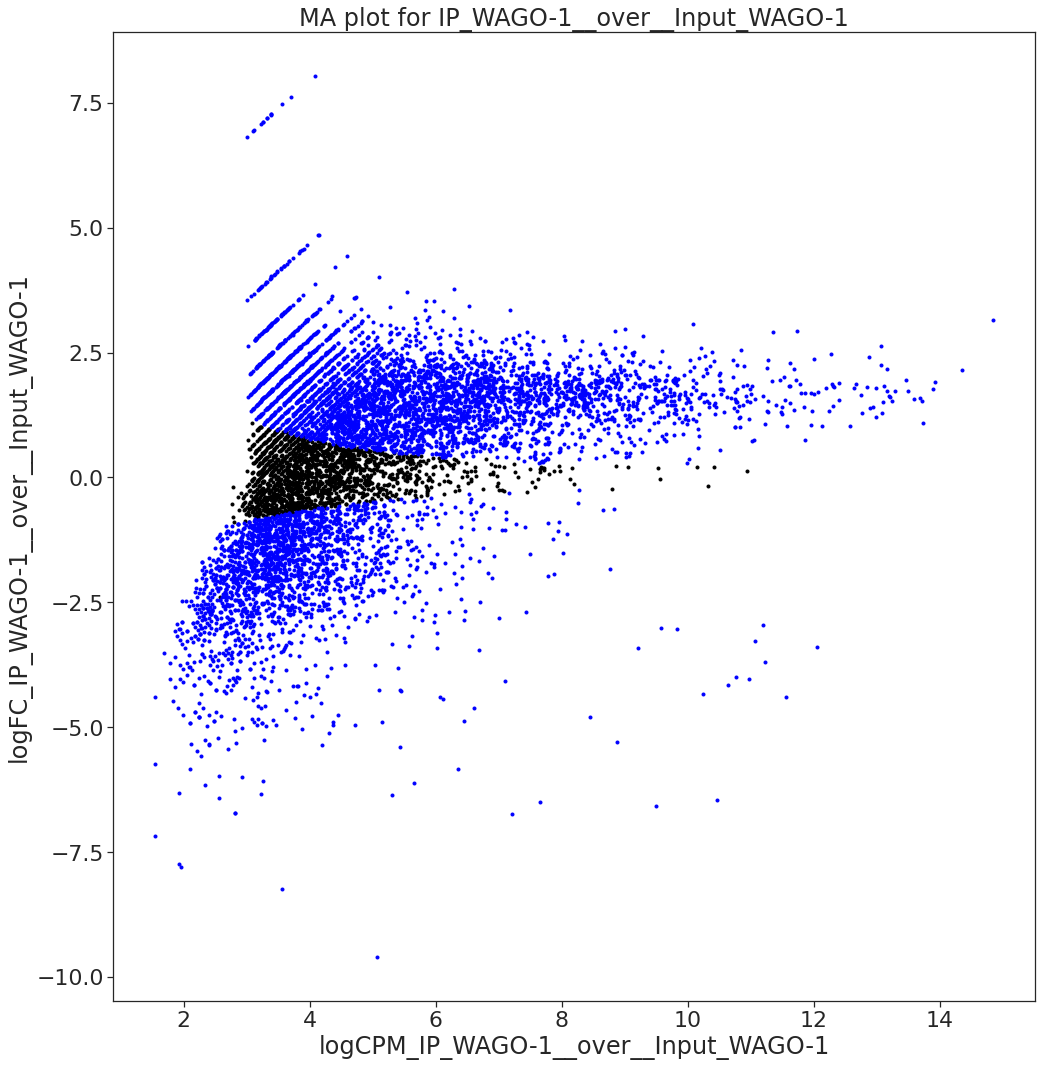

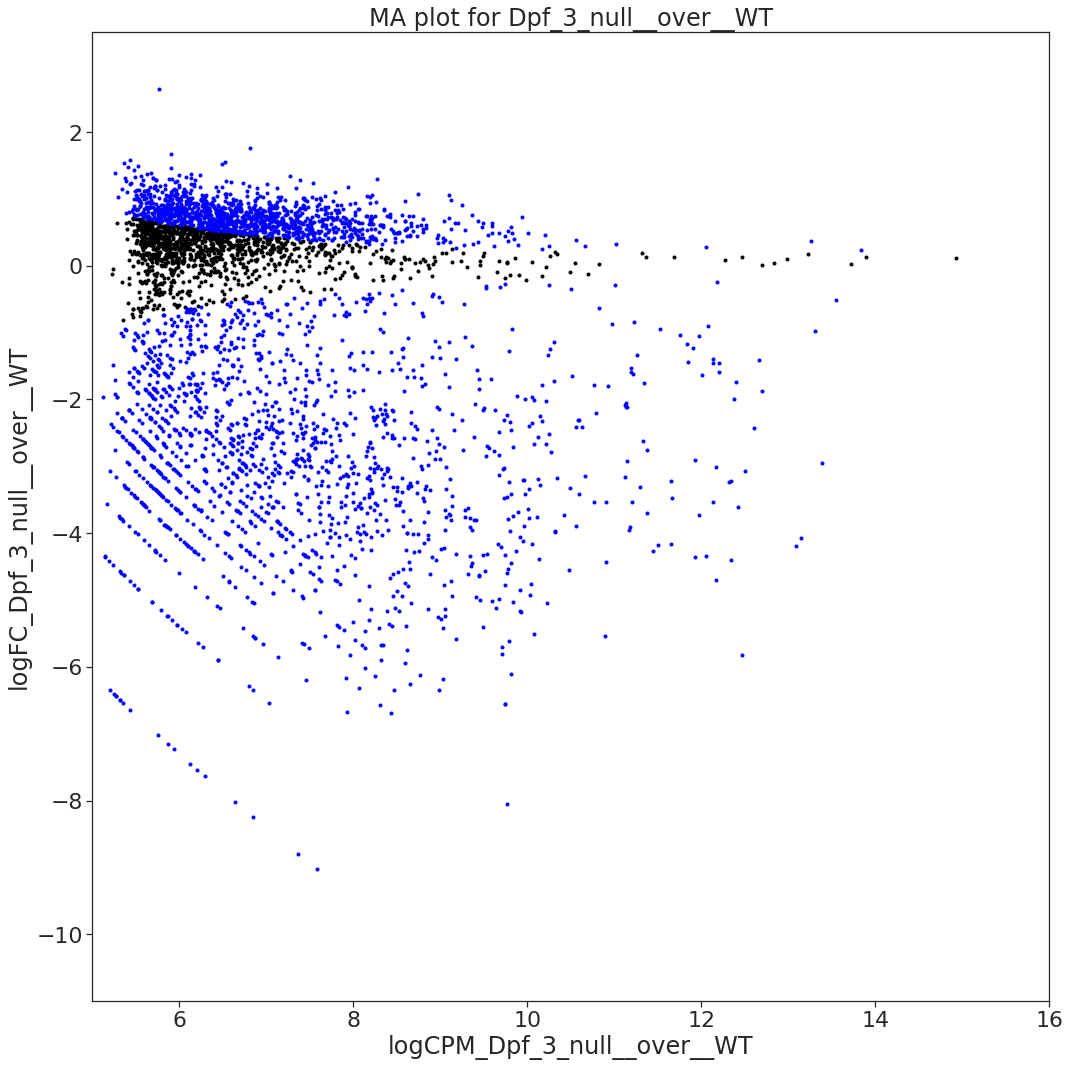

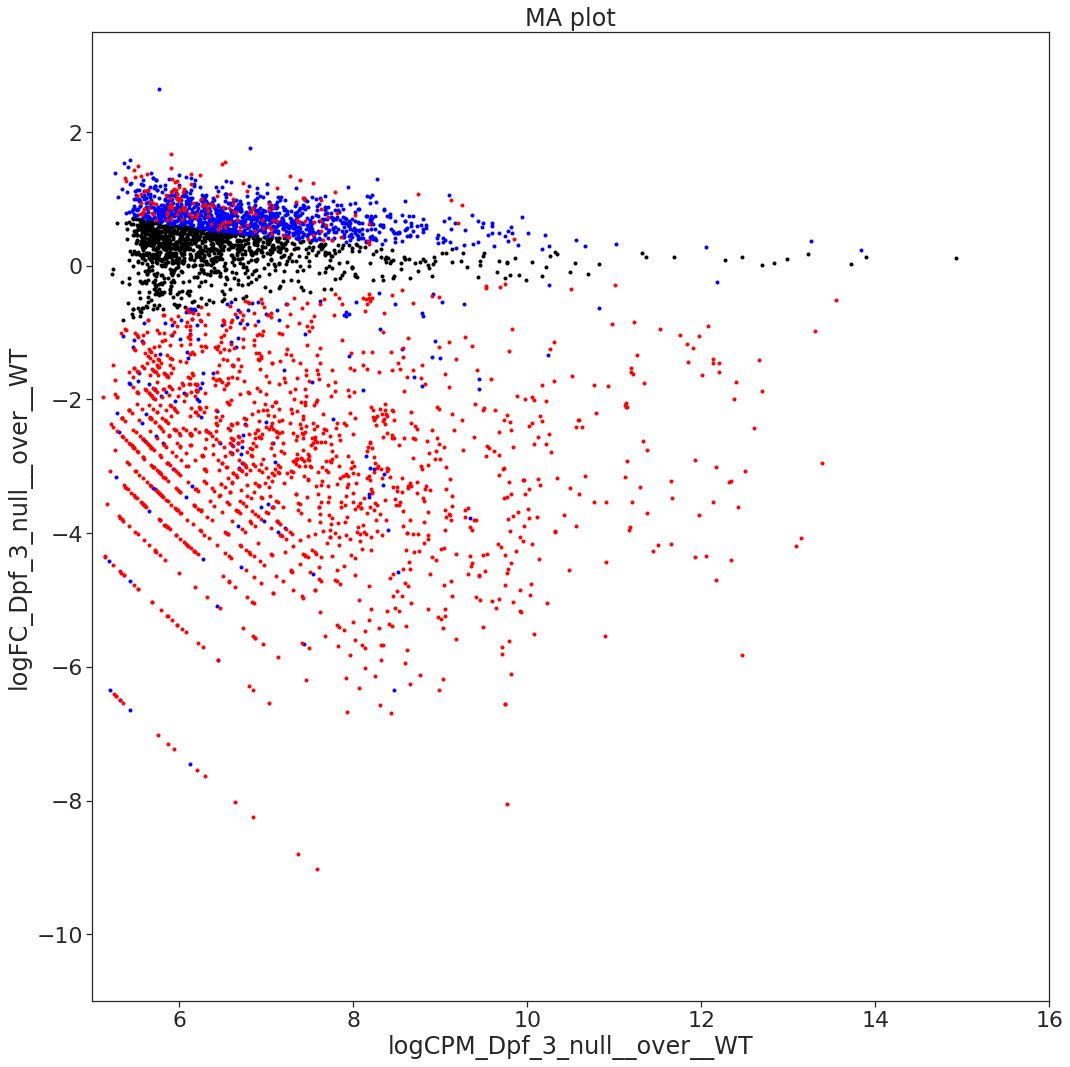

In [12]:
df_1_path = ip__Input_WAGO_1__IP_WAGO_1_path
df_1_name = ip__Input_WAGO_1__IP_WAGO_1_name

df_2_path = small_rna__WT__Dpf_3_null_path
df_2_name = small_rna__WT__Dpf_3_null_name

plot_merged_MA_plot(df_1_path, df_2_path, df_1_name, df_2_name)

## Small RNAs in dpf-3 null – WAGO-3 IP over Input

Significant details:
                                                                                                                                             Significant
FDR_Dpf_3_null__over__WT<0.05\nFDR_IP_WAGO-3__over__Input_WAGO-3<0.05\nlogFC_IP_WAGO-3__over__Input_WAGO-3>0\nlogFC_Dpf_3_null__over__WT<0)  1442       
No                                                                                                                                           1154       
FDR_Dpf_3_null__over__WT<0.05                                                                                                                1143       
FDR_Dpf_3_null__over__WT<0.05\nFDR_IP_WAGO-3__over__Input_WAGO-3<0.05\nlogFC_IP_WAGO-3__over__Input_WAGO-3>0\nlogFC_Dpf_3_null__over__WT>0)  192        


Significant:
                                                                                                               Significant
FDR_Dpf_3_null__over__WT<0.05\nFDR_IP_WAGO-3__over__Input_WAGO-3<0.05\nlogFC

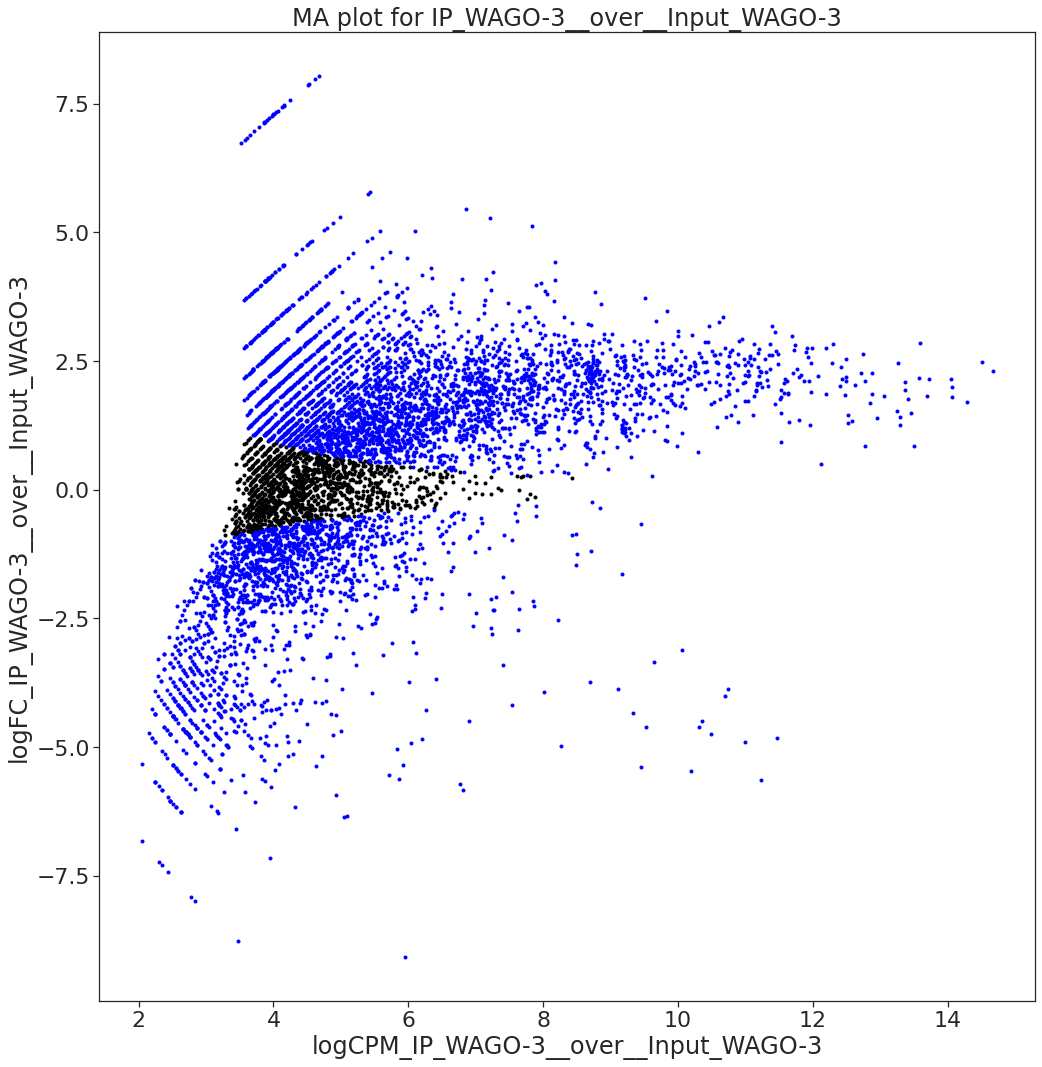

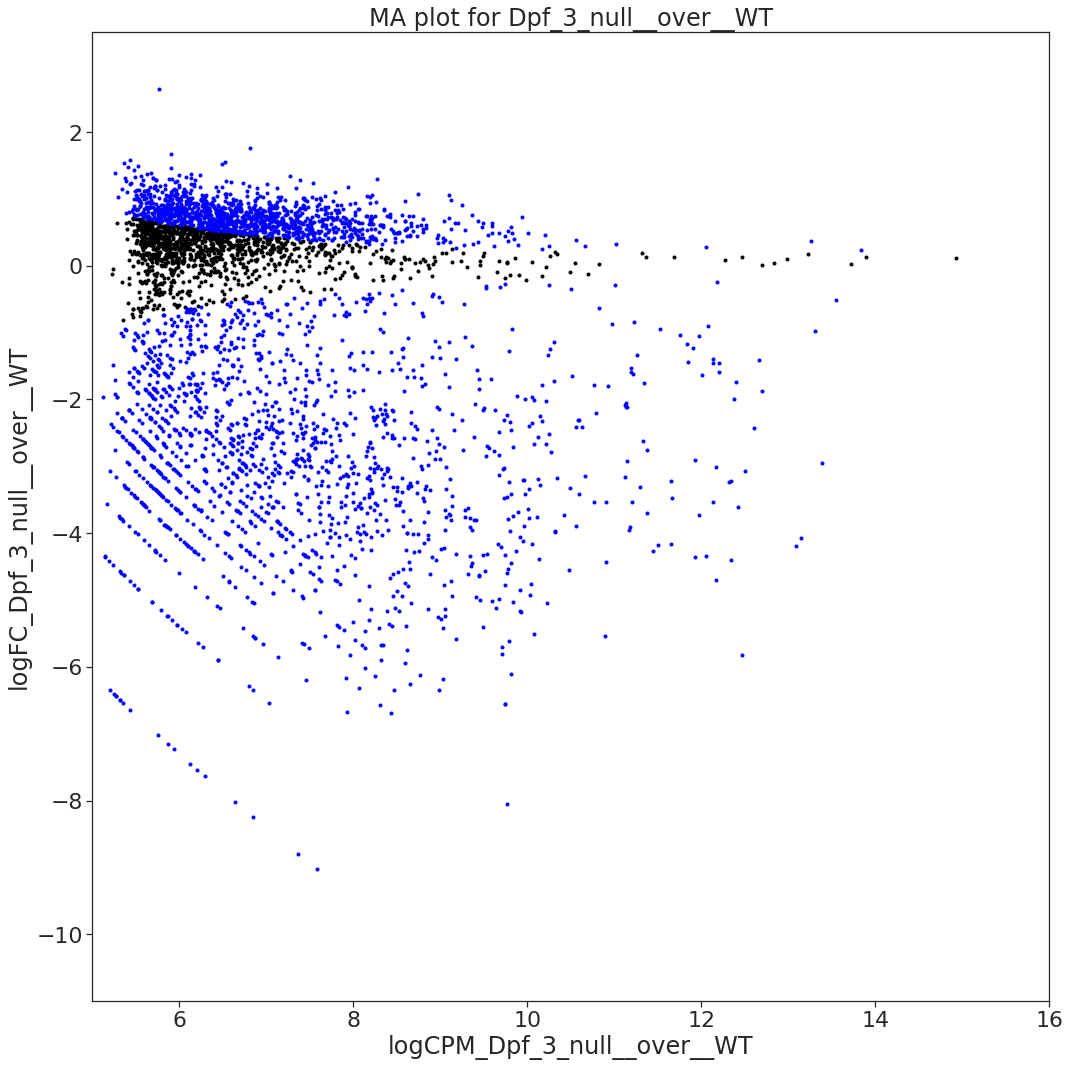

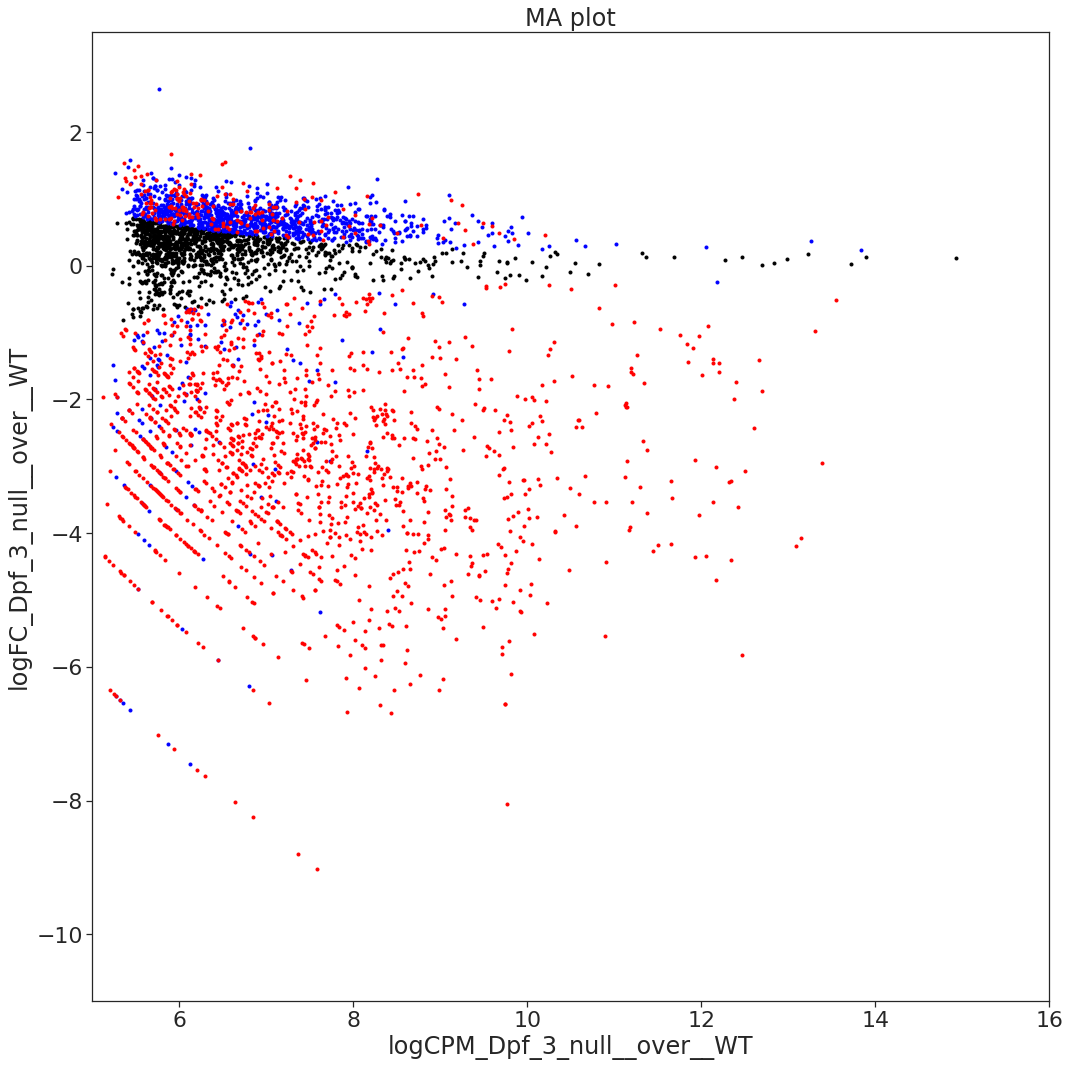

In [13]:
df_1_path = ip__Input_WAGO_3__IP_WAGO_3_path
df_1_name = ip__Input_WAGO_3__IP_WAGO_3_name

df_2_path = small_rna__WT__Dpf_3_null_path
df_2_name = small_rna__WT__Dpf_3_null_name

plot_merged_MA_plot(df_1_path, df_2_path, df_1_name, df_2_name)

## dpf-3 null – csr-1 over Input

Significant details:
                                                                                                                                         Significant
FDR_Dpf_3_null__over__WT<0.05                                                                                                            1718       
No                                                                                                                                       1154       
FDR_Dpf_3_null__over__WT<0.05\nFDR_IP_csr-1__over__csr-1_input<0.05\nlogFC_IP_csr-1__over__csr-1_input>0\nlogFC_Dpf_3_null__over__WT>0)  1009       
FDR_Dpf_3_null__over__WT<0.05\nFDR_IP_csr-1__over__csr-1_input<0.05\nlogFC_IP_csr-1__over__csr-1_input>0\nlogFC_Dpf_3_null__over__WT<0)  50         


Significant:
                                                                                                           Significant
FDR_Dpf_3_null__over__WT<0.05                                                                       

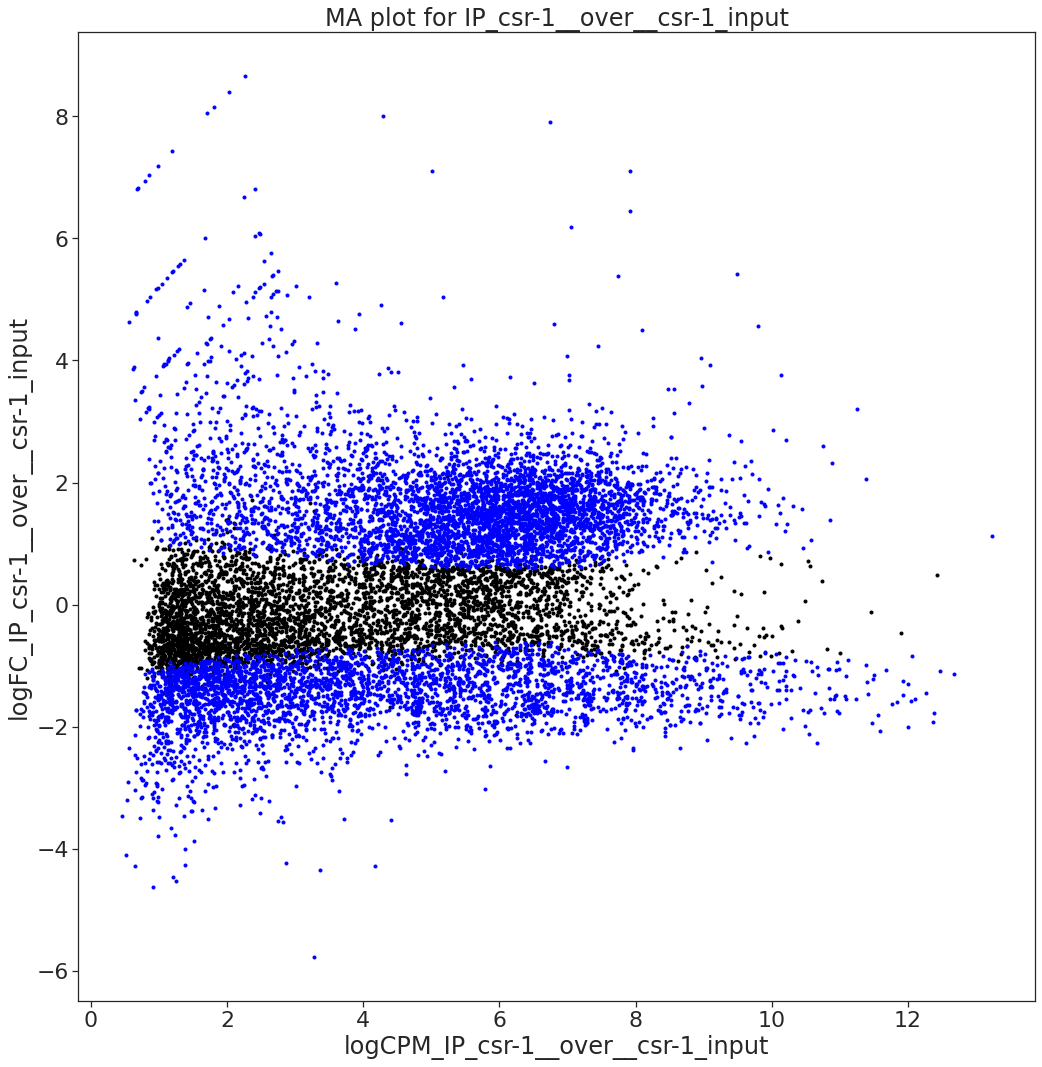

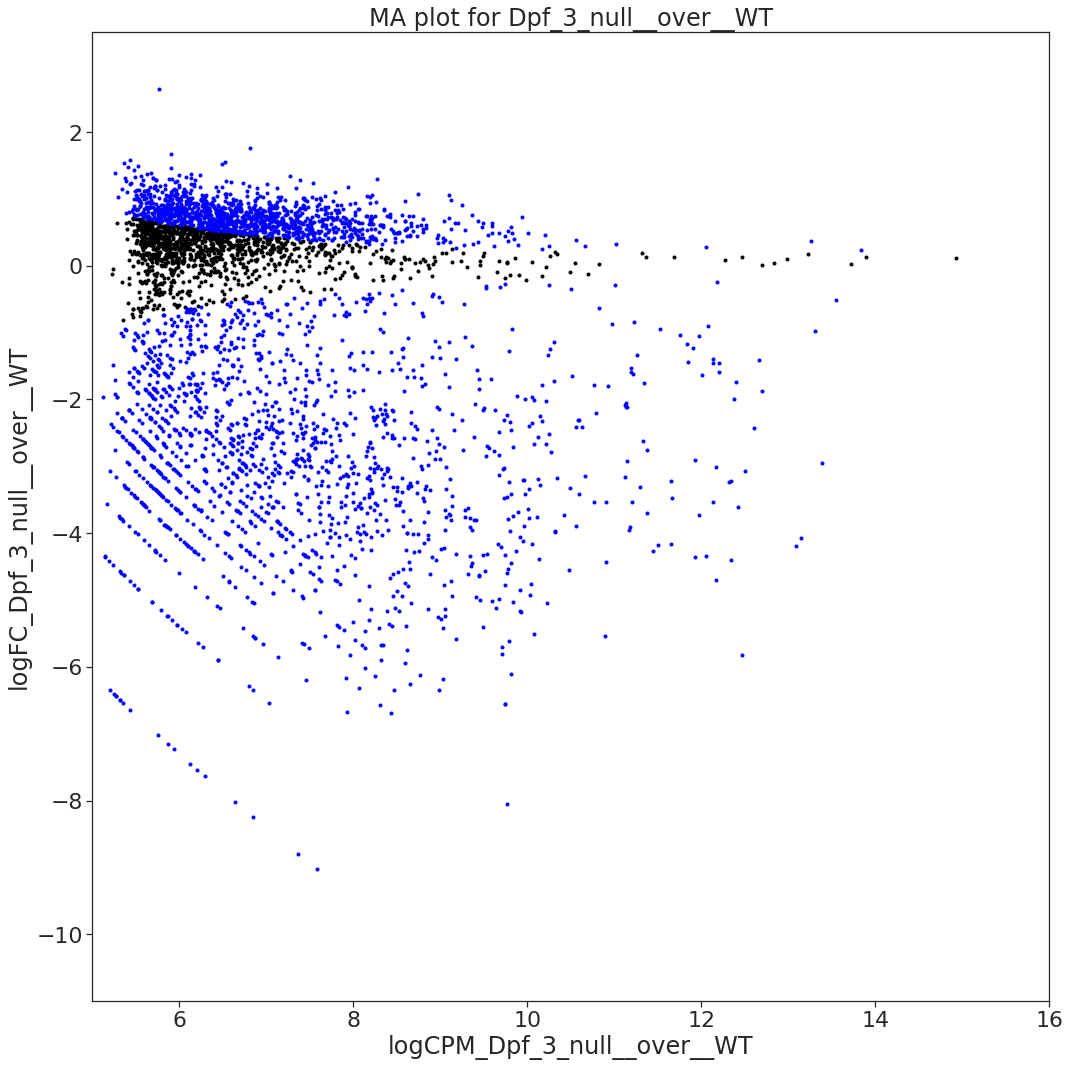

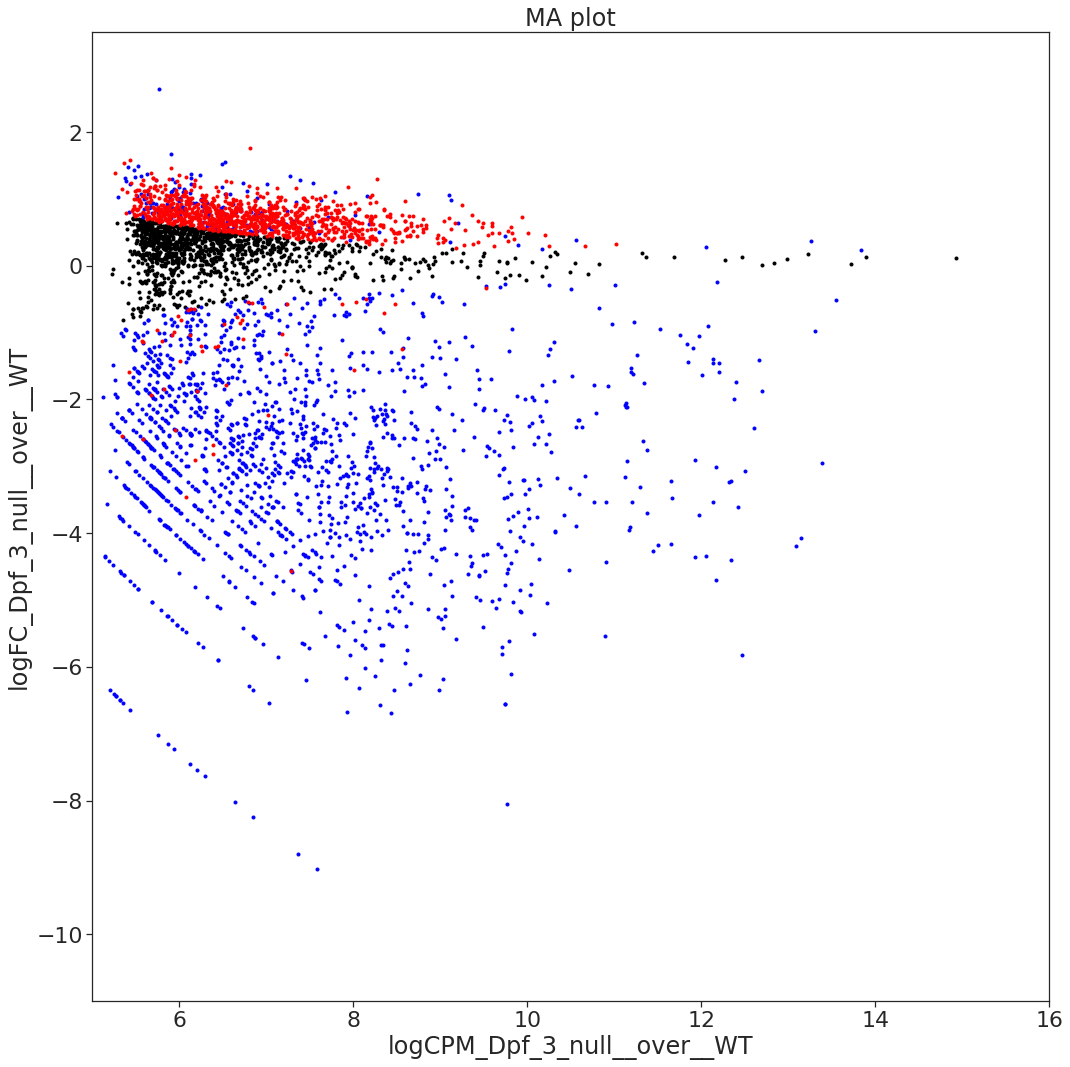

In [14]:
df_1_path = ip__csr_1_input__csr_1_IP_path
df_1_name = ip__csr_1_input__csr_1_IP_name

df_2_path = small_rna__WT__Dpf_3_null_path
df_2_name = small_rna__WT__Dpf_3_null_name

plot_merged_MA_plot(df_1_path, df_2_path, df_1_name, df_2_name)

# Small RNAs in DPF-3 S784A

## 6. Small RNAs in DPF-3 S784A – WAGO-1 IP over Input

Significant details:
                                                                                                                                               Significant
No                                                                                                                                             1371       
FDR_Dpf_3_S784A__over__WT<0.05\nFDR_IP_WAGO-1__over__Input_WAGO-1<0.05\nlogFC_IP_WAGO-1__over__Input_WAGO-1>0\nlogFC_Dpf_3_S784A__over__WT<0)  1258       
FDR_Dpf_3_S784A__over__WT<0.05                                                                                                                 553        
FDR_Dpf_3_S784A__over__WT<0.05\nFDR_IP_WAGO-1__over__Input_WAGO-1<0.05\nlogFC_IP_WAGO-1__over__Input_WAGO-1>0\nlogFC_Dpf_3_S784A__over__WT>0)  52         


Significant:
                                                                                                                Significant
No                                                               

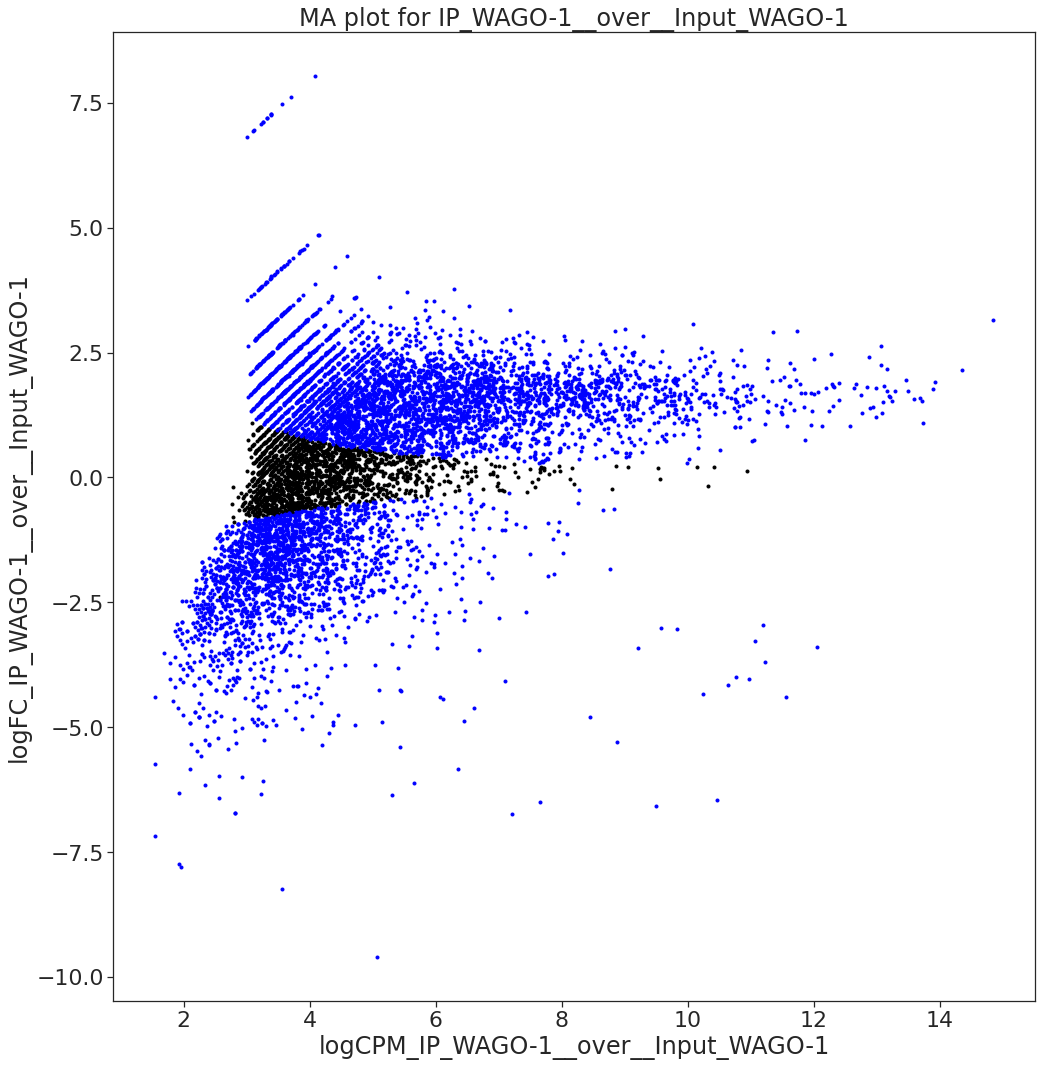

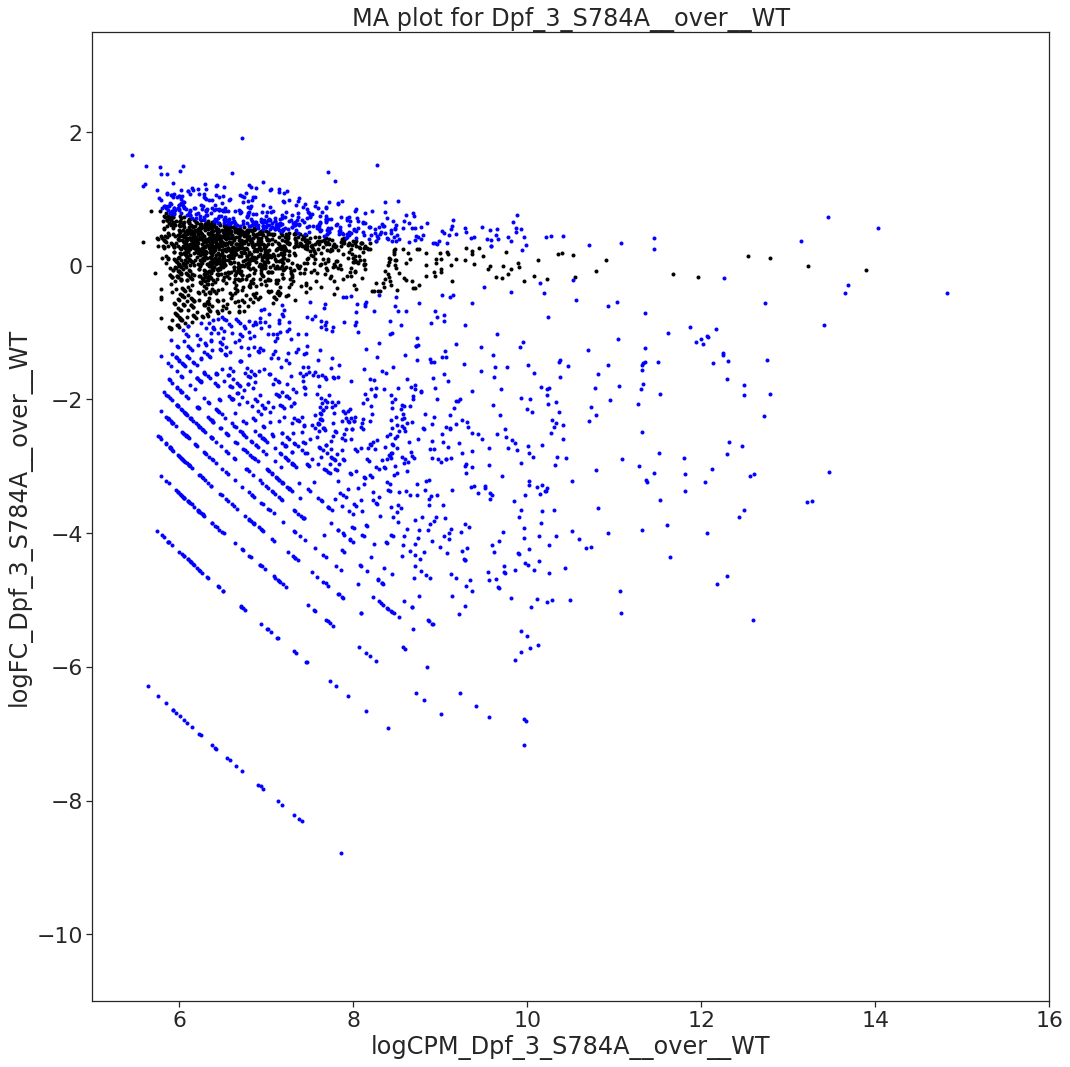

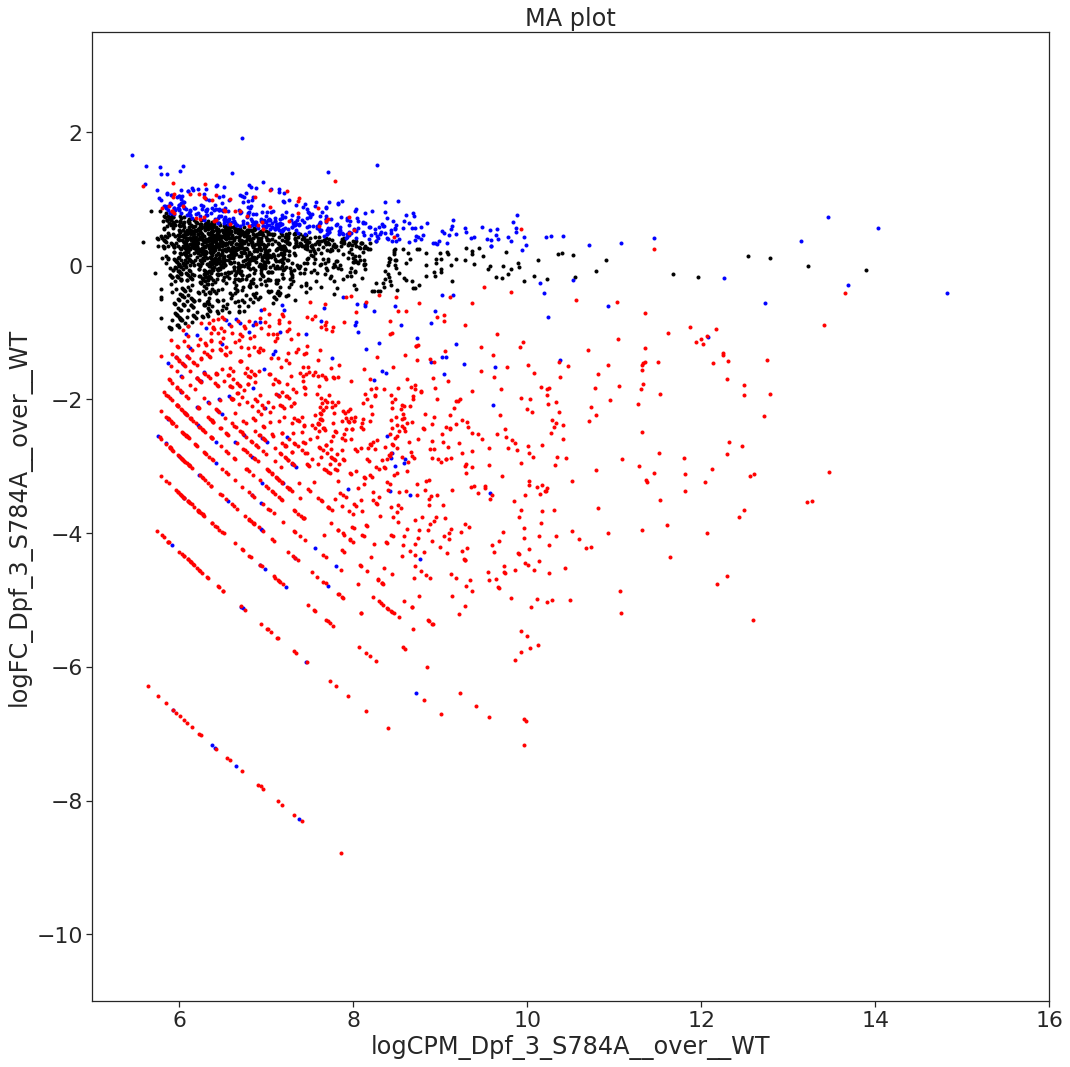

In [15]:
df_1_path = ip__Input_WAGO_1__IP_WAGO_1_path
df_1_name = ip__Input_WAGO_1__IP_WAGO_1_name

df_2_path = small_rna__WT__Dpf_3_S784A_path
df_2_name = small_rna__WT__Dpf_3_S784A_name

plot_merged_MA_plot(df_1_path, df_2_path, df_1_name, df_2_name)

## Small RNAs in DPF-3 S784A – WAGO-3 bound IP over Input

Significant details:
                                                                                                                                               Significant
No                                                                                                                                             1371       
FDR_Dpf_3_S784A__over__WT<0.05\nFDR_IP_WAGO-3__over__Input_WAGO-3<0.05\nlogFC_IP_WAGO-3__over__Input_WAGO-3>0\nlogFC_Dpf_3_S784A__over__WT<0)  1276       
FDR_Dpf_3_S784A__over__WT<0.05                                                                                                                 506        
FDR_Dpf_3_S784A__over__WT<0.05\nFDR_IP_WAGO-3__over__Input_WAGO-3<0.05\nlogFC_IP_WAGO-3__over__Input_WAGO-3>0\nlogFC_Dpf_3_S784A__over__WT>0)  81         


Significant:
                                                                                                                Significant
No                                                               

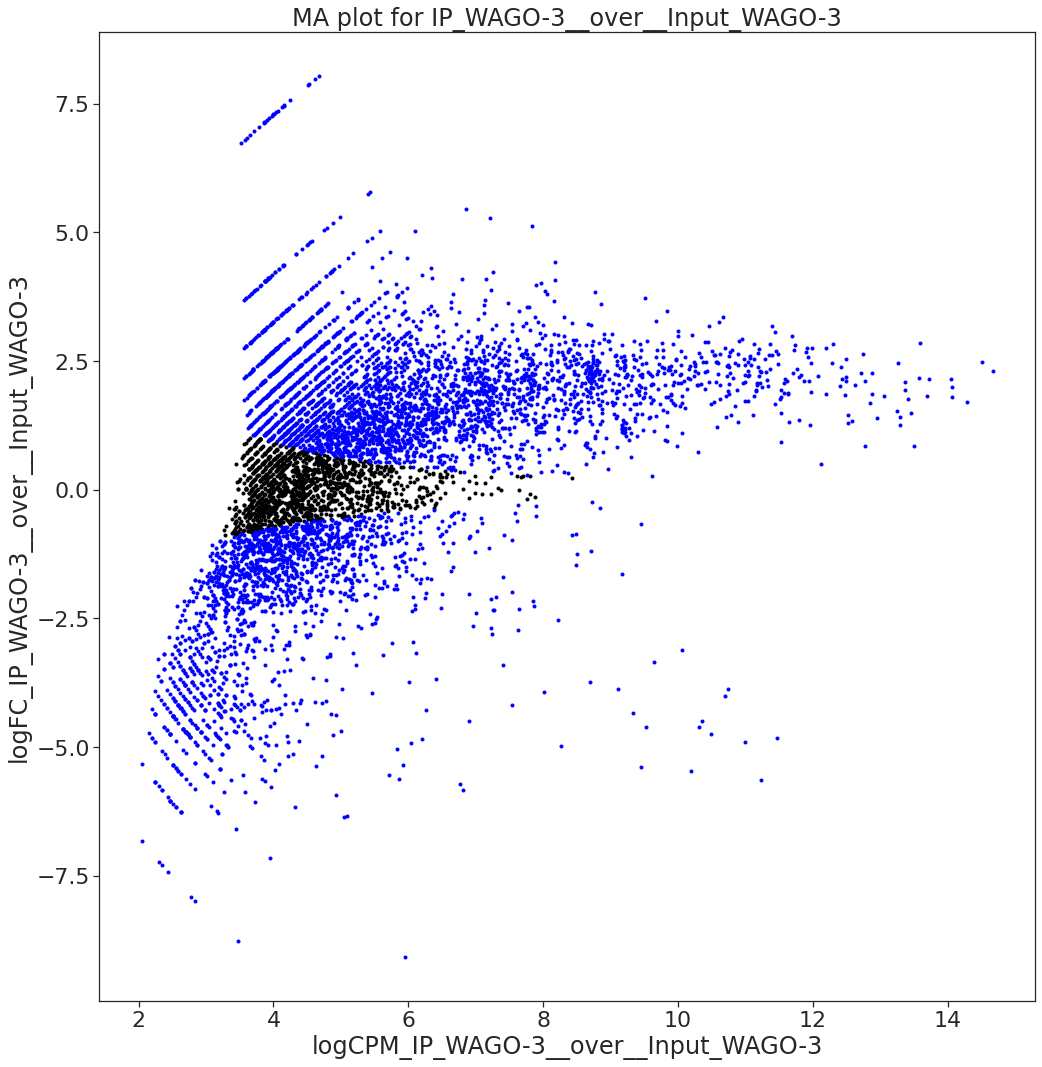

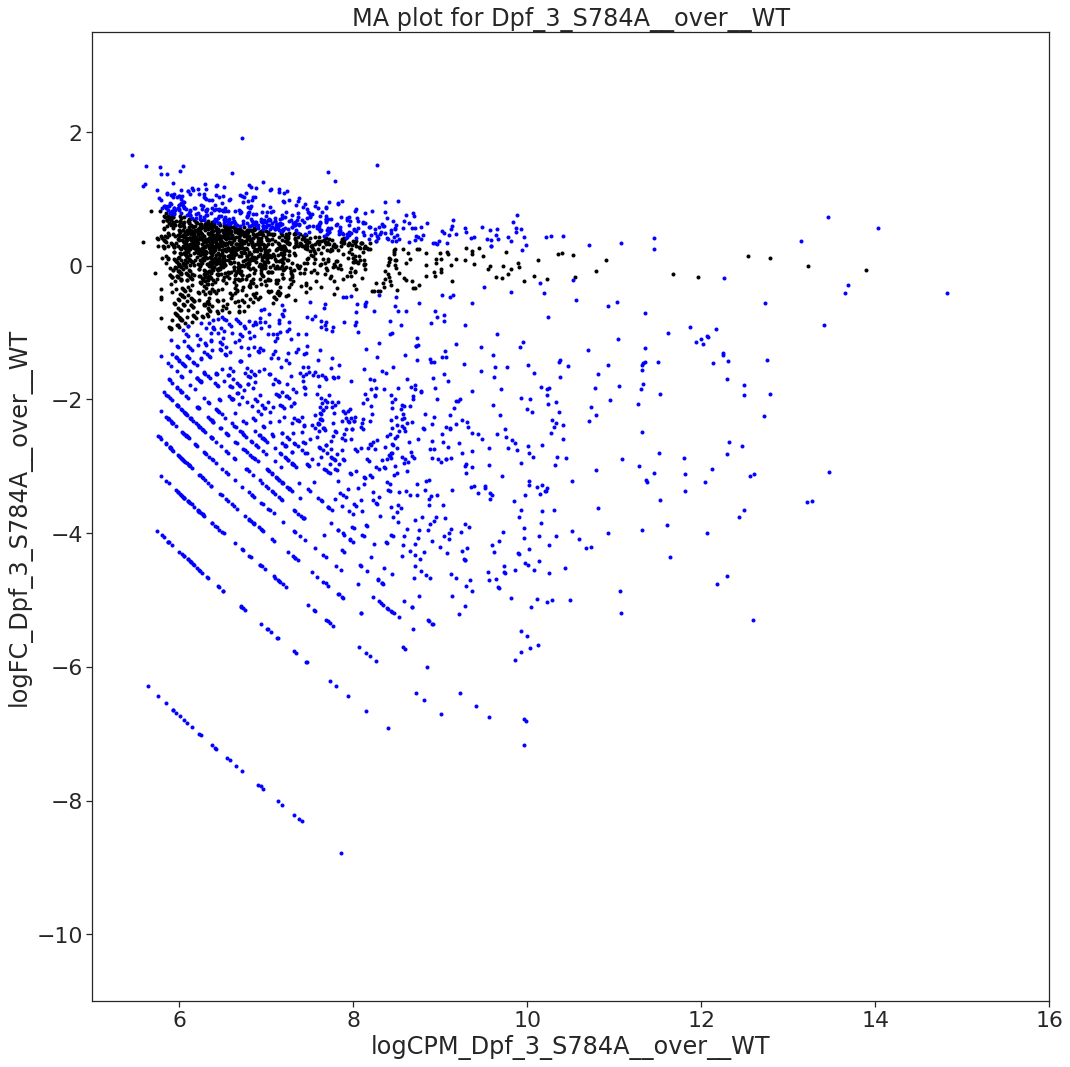

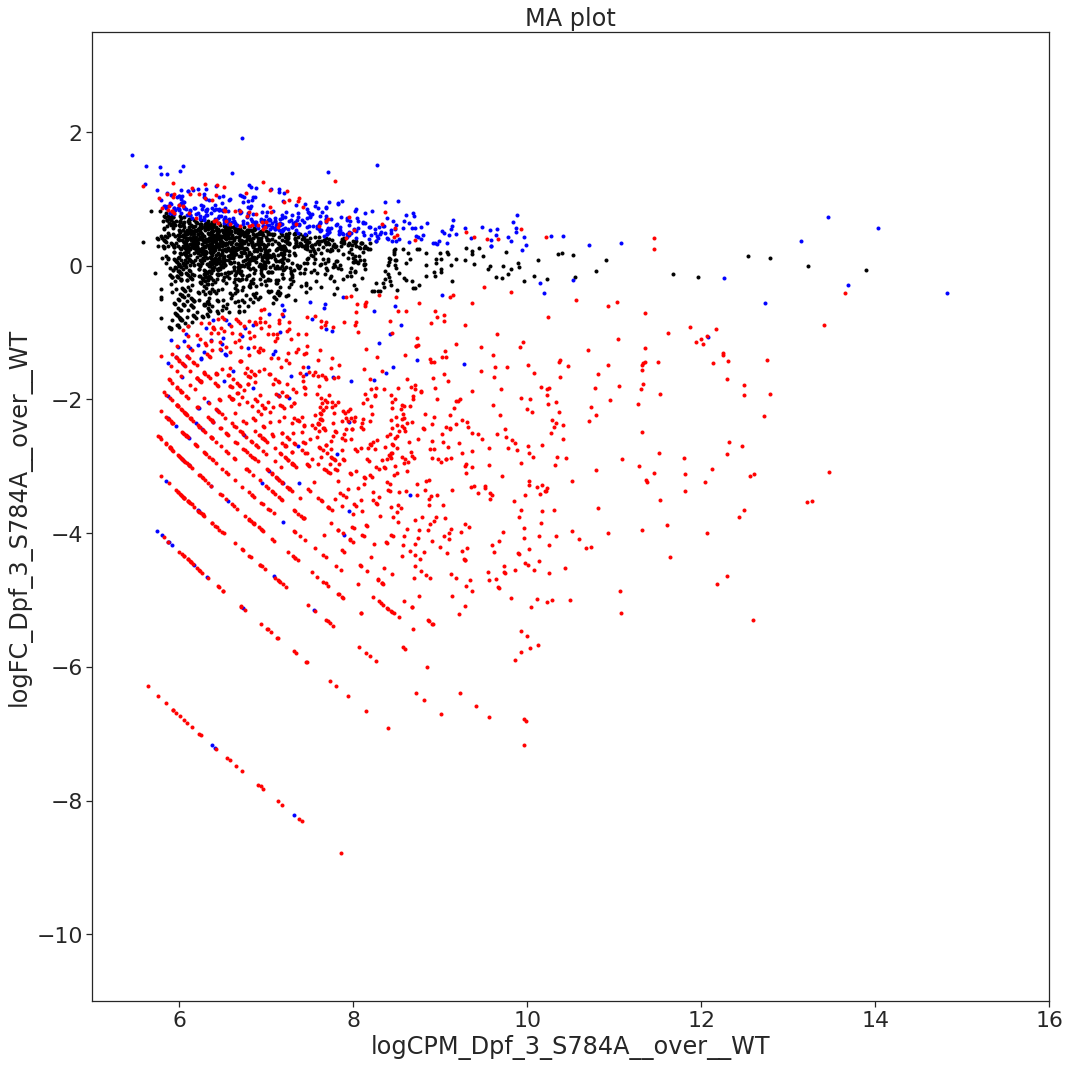

In [16]:
df_1_path = ip__Input_WAGO_3__IP_WAGO_3_path
df_1_name = ip__Input_WAGO_3__IP_WAGO_3_name

df_2_path = small_rna__WT__Dpf_3_S784A_path
df_2_name = small_rna__WT__Dpf_3_S784A_name

plot_merged_MA_plot(df_1_path, df_2_path, df_1_name, df_2_name)

## Small RNAs dpf-3 S784A – csr-1 over Input

Significant details:
                                                                                                                                           Significant
FDR_Dpf_3_S784A__over__WT<0.05                                                                                                             1424       
No                                                                                                                                         1371       
FDR_Dpf_3_S784A__over__WT<0.05\nFDR_IP_csr-1__over__csr-1_input<0.05\nlogFC_IP_csr-1__over__csr-1_input>0\nlogFC_Dpf_3_S784A__over__WT>0)  397        
FDR_Dpf_3_S784A__over__WT<0.05\nFDR_IP_csr-1__over__csr-1_input<0.05\nlogFC_IP_csr-1__over__csr-1_input>0\nlogFC_Dpf_3_S784A__over__WT<0)  42         


Significant:
                                                                                                            Significant
FDR_Dpf_3_S784A__over__WT<0.05                                                           

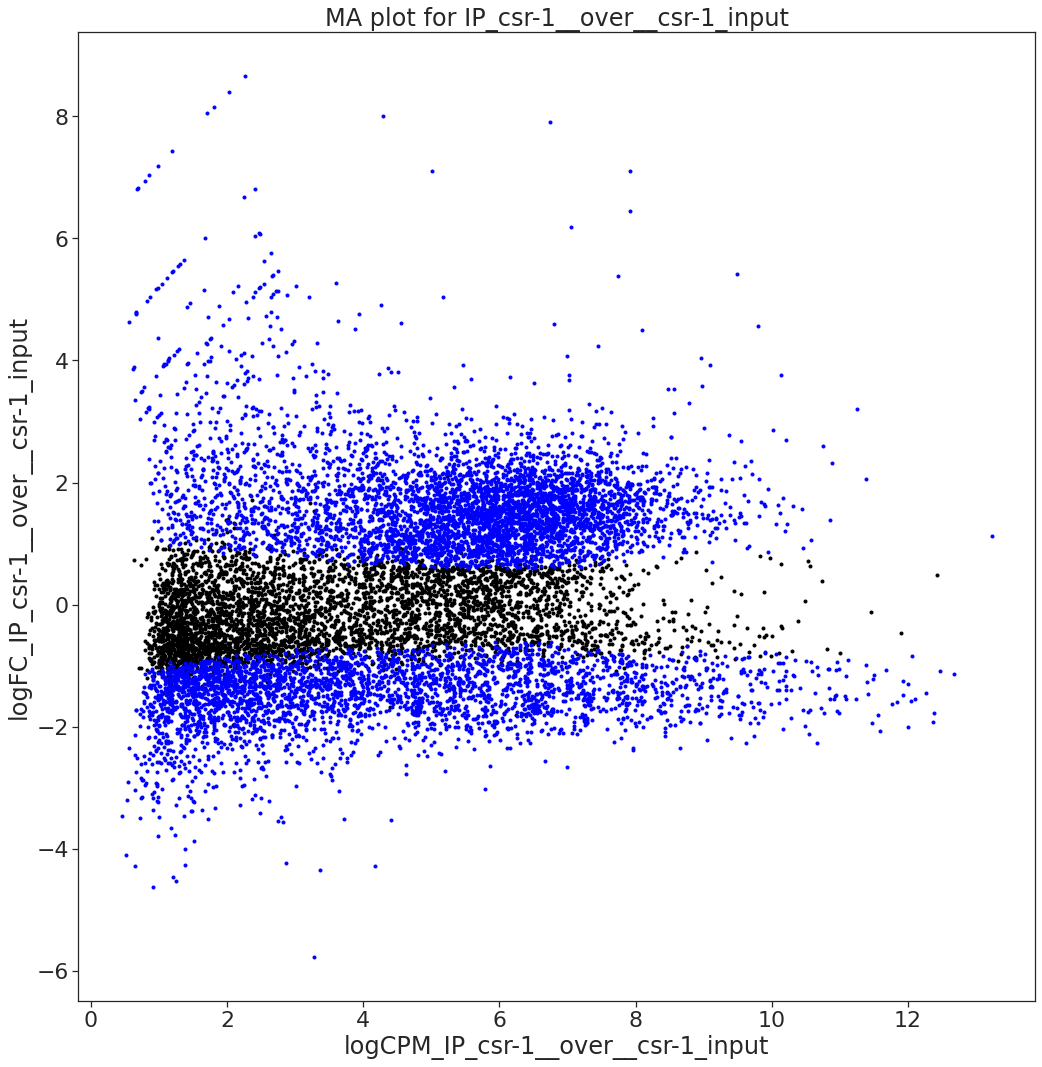

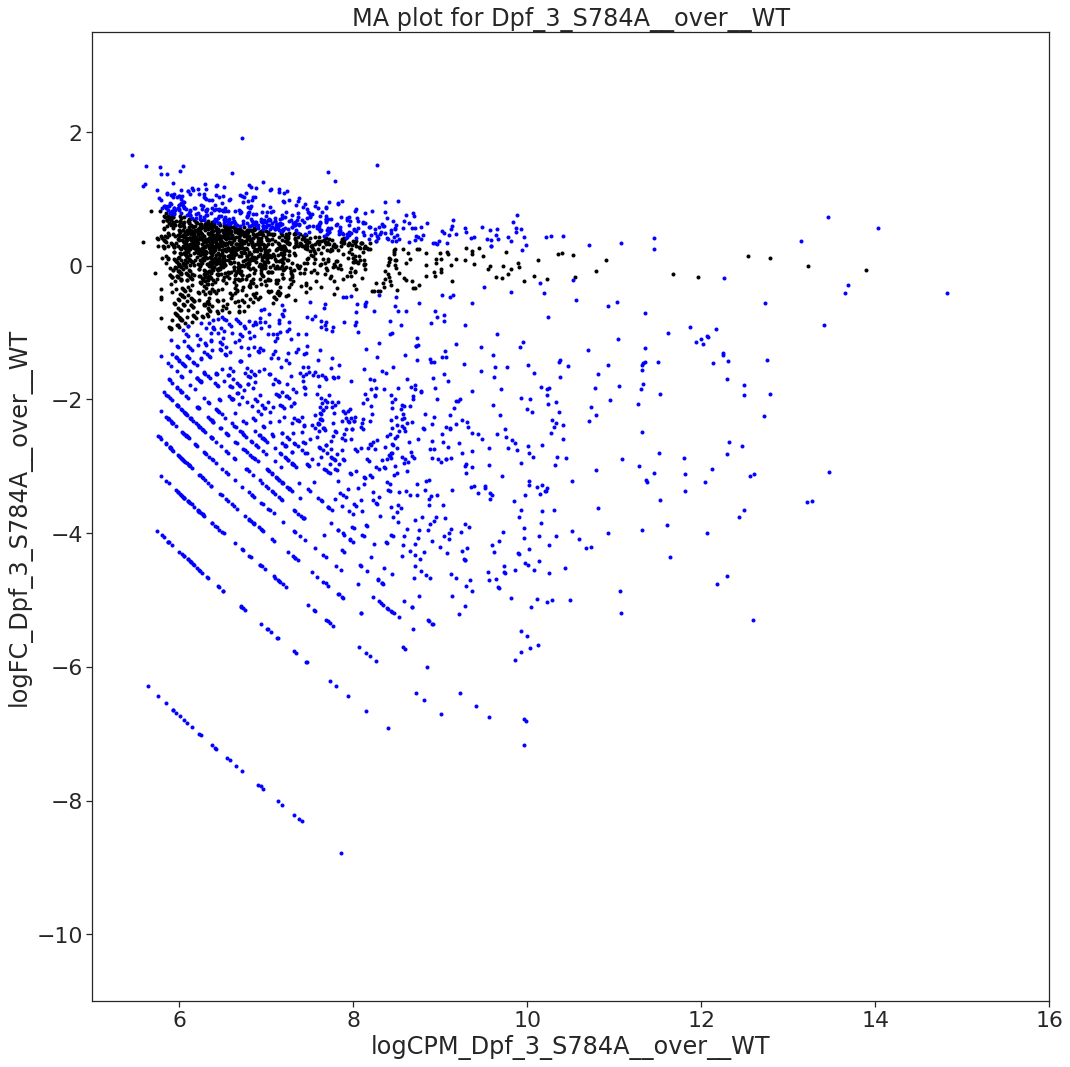

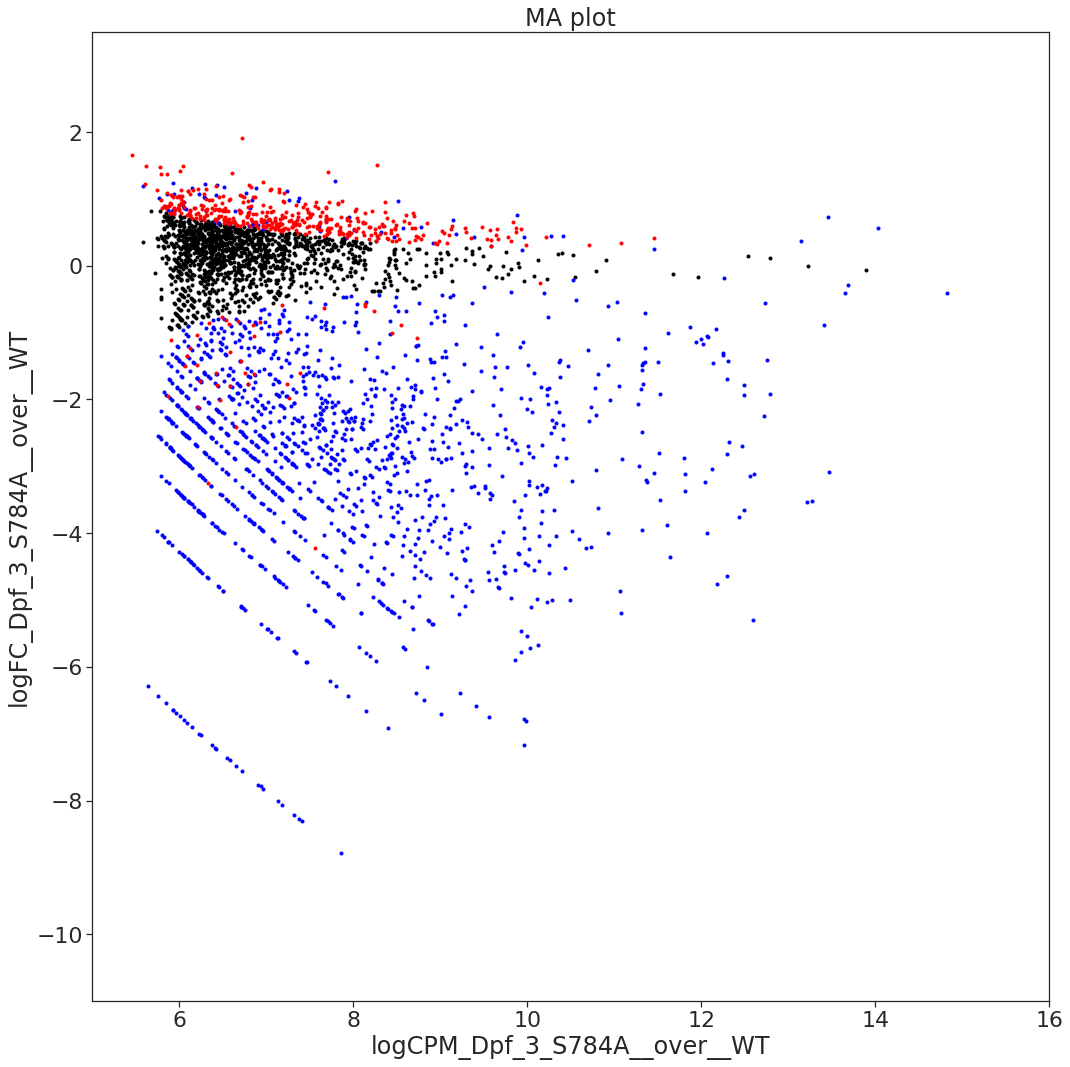

In [17]:
df_1_path = ip__csr_1_input__csr_1_IP_path
df_1_name = ip__csr_1_input__csr_1_IP_name

df_2_path = small_rna__WT__Dpf_3_S784A_path
df_2_name = small_rna__WT__Dpf_3_S784A_name

plot_merged_MA_plot(df_1_path, df_2_path, df_1_name, df_2_name)

# Small RNAs in mut-2

## Small RNAs mut-2 – WAGO-1 over Input

Significant details:
                                                                                                                                   Significant
FDR_mut_2__over__WT<0.05\nFDR_IP_WAGO-1__over__Input_WAGO-1<0.05\nlogFC_IP_WAGO-1__over__Input_WAGO-1>0\nlogFC_mut_2__over__WT<0)  1448       
No                                                                                                                                 962        
FDR_mut_2__over__WT<0.05                                                                                                           796        
FDR_mut_2__over__WT<0.05\nFDR_IP_WAGO-1__over__Input_WAGO-1<0.05\nlogFC_IP_WAGO-1__over__Input_WAGO-1>0\nlogFC_mut_2__over__WT>0)  21         


Significant:
                                                                                                          Significant
FDR_mut_2__over__WT<0.05\nFDR_IP_WAGO-1__over__Input_WAGO-1<0.05\nlogFC_IP_WAGO-1__over__Input_WAGO-1>0)  1469       
No           

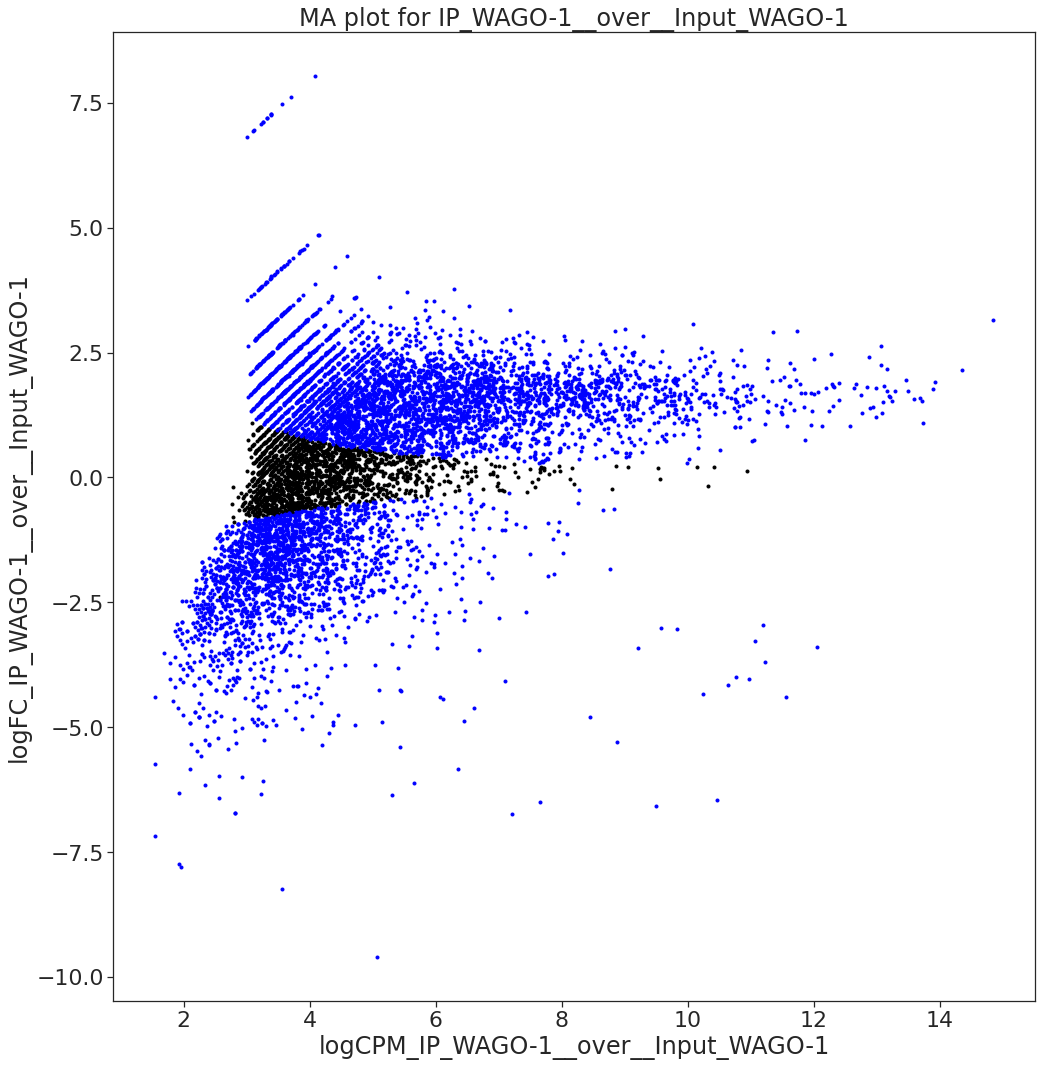

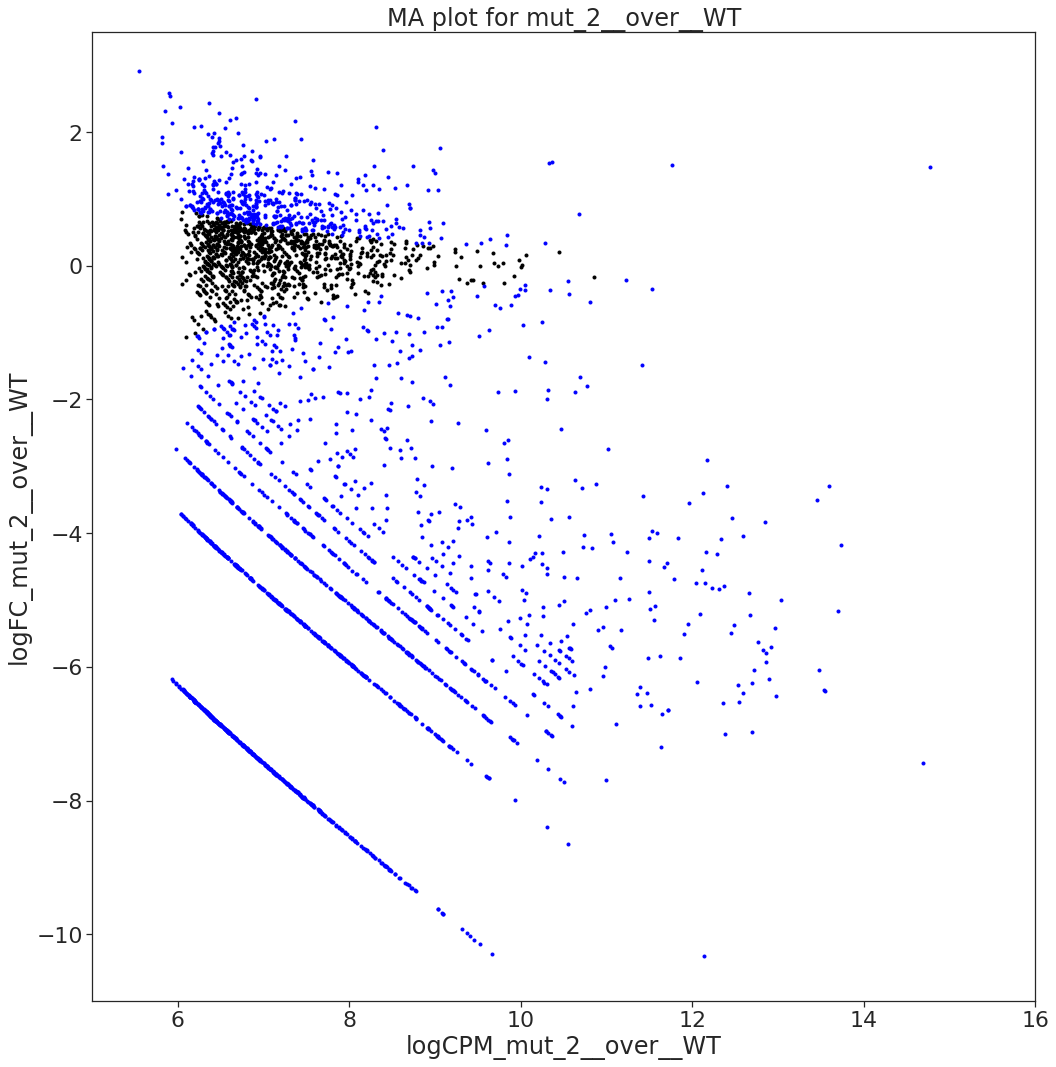

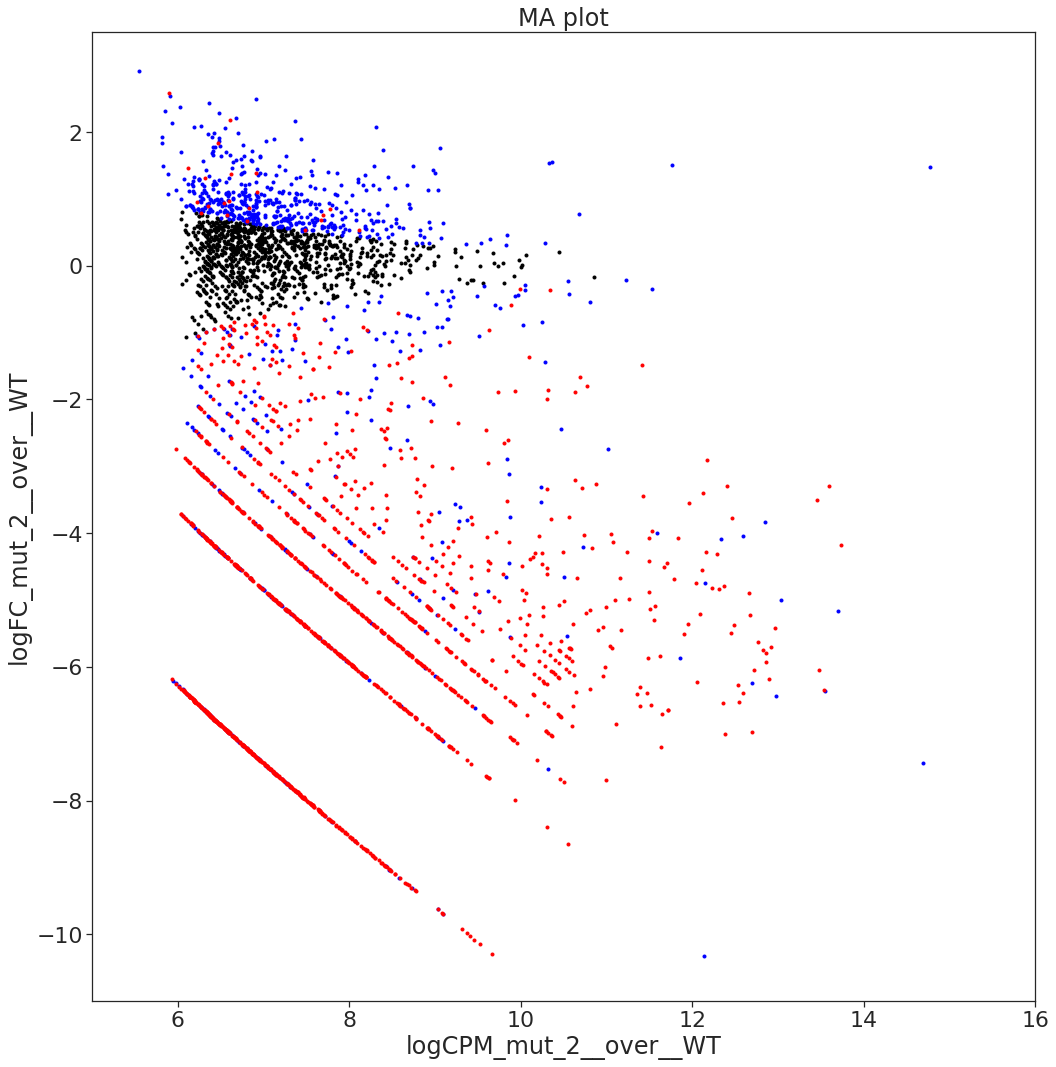

In [18]:
df_1_path = ip__Input_WAGO_1__IP_WAGO_1_path
df_1_name = ip__Input_WAGO_1__IP_WAGO_1_name

df_2_path = small_rna__WT__mut_2_path
df_2_name = small_rna__WT__mut_2_name

plot_merged_MA_plot(df_1_path, df_2_path, df_1_name, df_2_name)

## Small RNAs in mut-2 – WAGO-3 IP over Input

Significant details:
                                                                                                                                   Significant
FDR_mut_2__over__WT<0.05\nFDR_IP_WAGO-3__over__Input_WAGO-3<0.05\nlogFC_IP_WAGO-3__over__Input_WAGO-3>0\nlogFC_mut_2__over__WT<0)  1469       
No                                                                                                                                 962        
FDR_mut_2__over__WT<0.05                                                                                                           769        
FDR_mut_2__over__WT<0.05\nFDR_IP_WAGO-3__over__Input_WAGO-3<0.05\nlogFC_IP_WAGO-3__over__Input_WAGO-3>0\nlogFC_mut_2__over__WT>0)  27         


Significant:
                                                                                                          Significant
FDR_mut_2__over__WT<0.05\nFDR_IP_WAGO-3__over__Input_WAGO-3<0.05\nlogFC_IP_WAGO-3__over__Input_WAGO-3>0)  1496       
No           

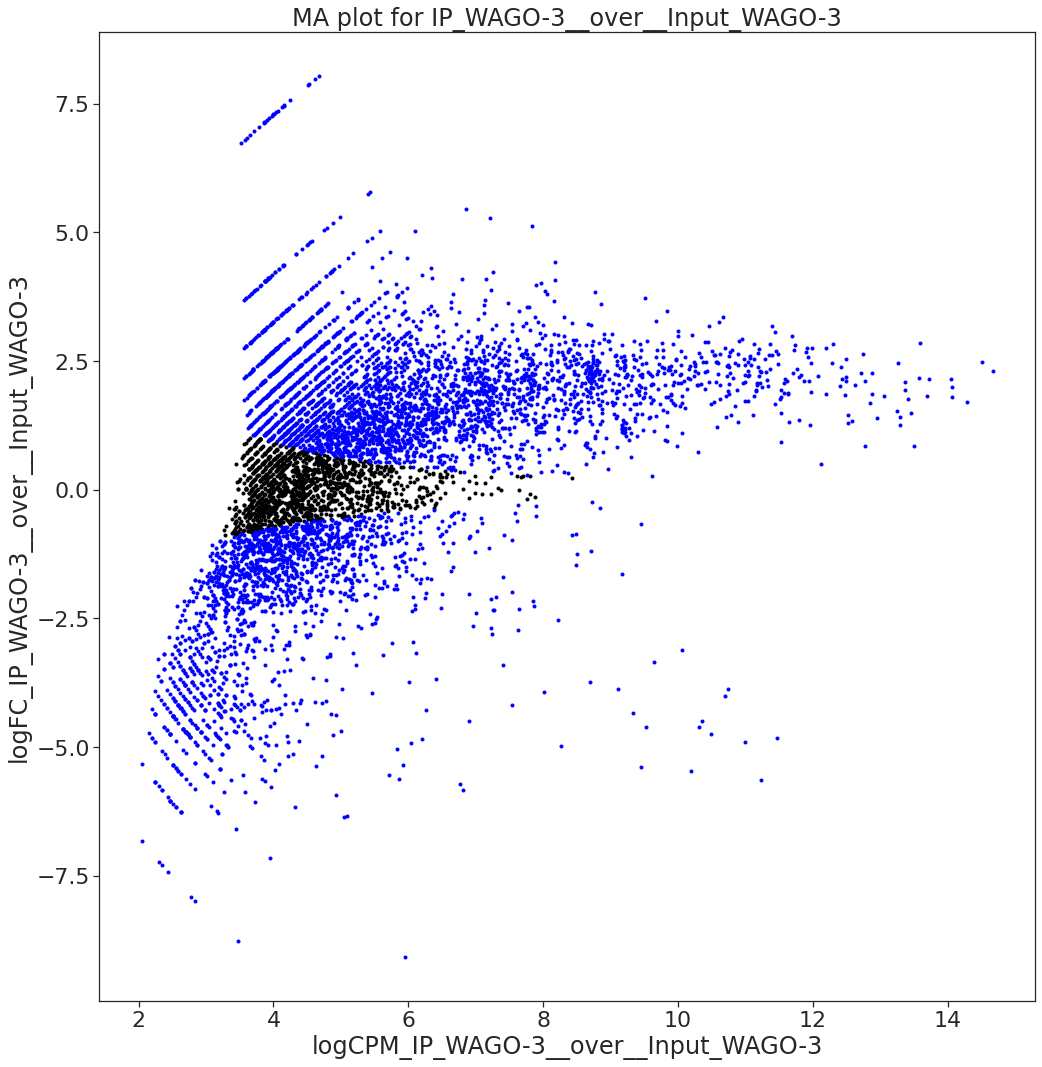

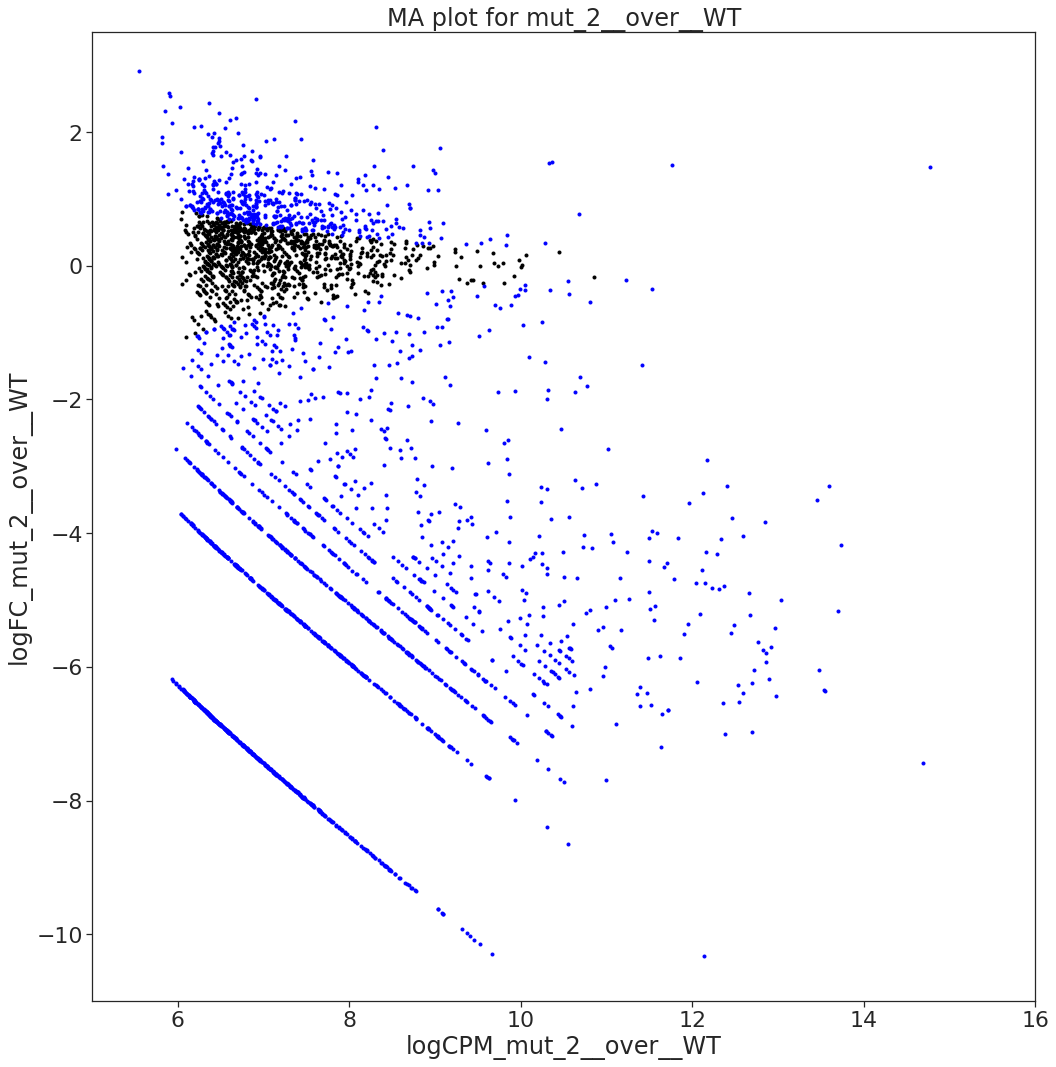

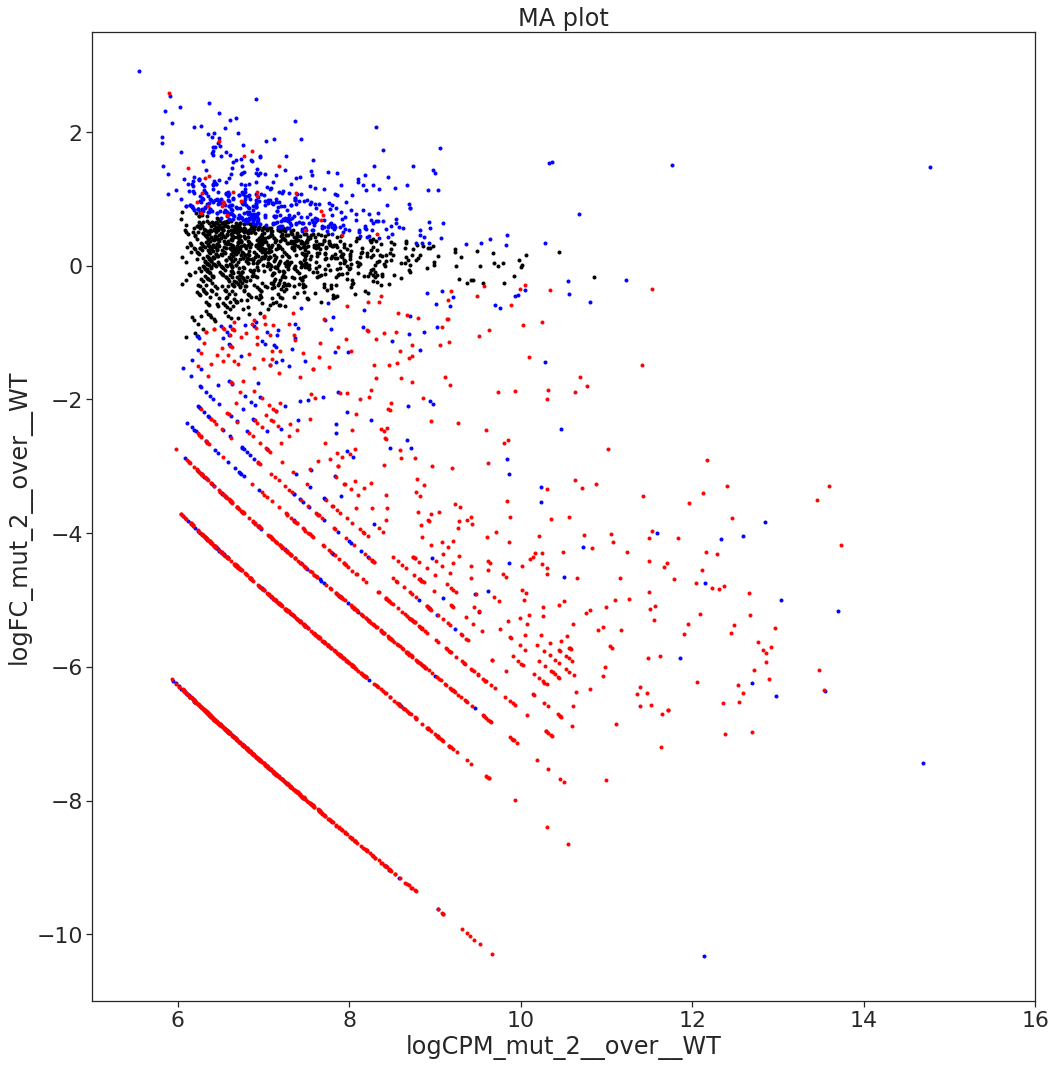

In [19]:
df_1_path = ip__Input_WAGO_3__IP_WAGO_3_path
df_1_name = ip__Input_WAGO_3__IP_WAGO_3_name

df_2_path = small_rna__WT__mut_2_path
df_2_name = small_rna__WT__mut_2_name

plot_merged_MA_plot(df_1_path, df_2_path, df_1_name, df_2_name)

## Small RNAs mut-2 – csr-1 over Input

Significant details:
                                                                                                                               Significant
FDR_mut_2__over__WT<0.05                                                                                                       1676       
No                                                                                                                             962        
FDR_mut_2__over__WT<0.05\nFDR_IP_csr-1__over__csr-1_input<0.05\nlogFC_IP_csr-1__over__csr-1_input>0\nlogFC_mut_2__over__WT>0)  455        
FDR_mut_2__over__WT<0.05\nFDR_IP_csr-1__over__csr-1_input<0.05\nlogFC_IP_csr-1__over__csr-1_input>0\nlogFC_mut_2__over__WT<0)  134        


Significant:
                                                                                                      Significant
FDR_mut_2__over__WT<0.05                                                                              1676       
No                                       

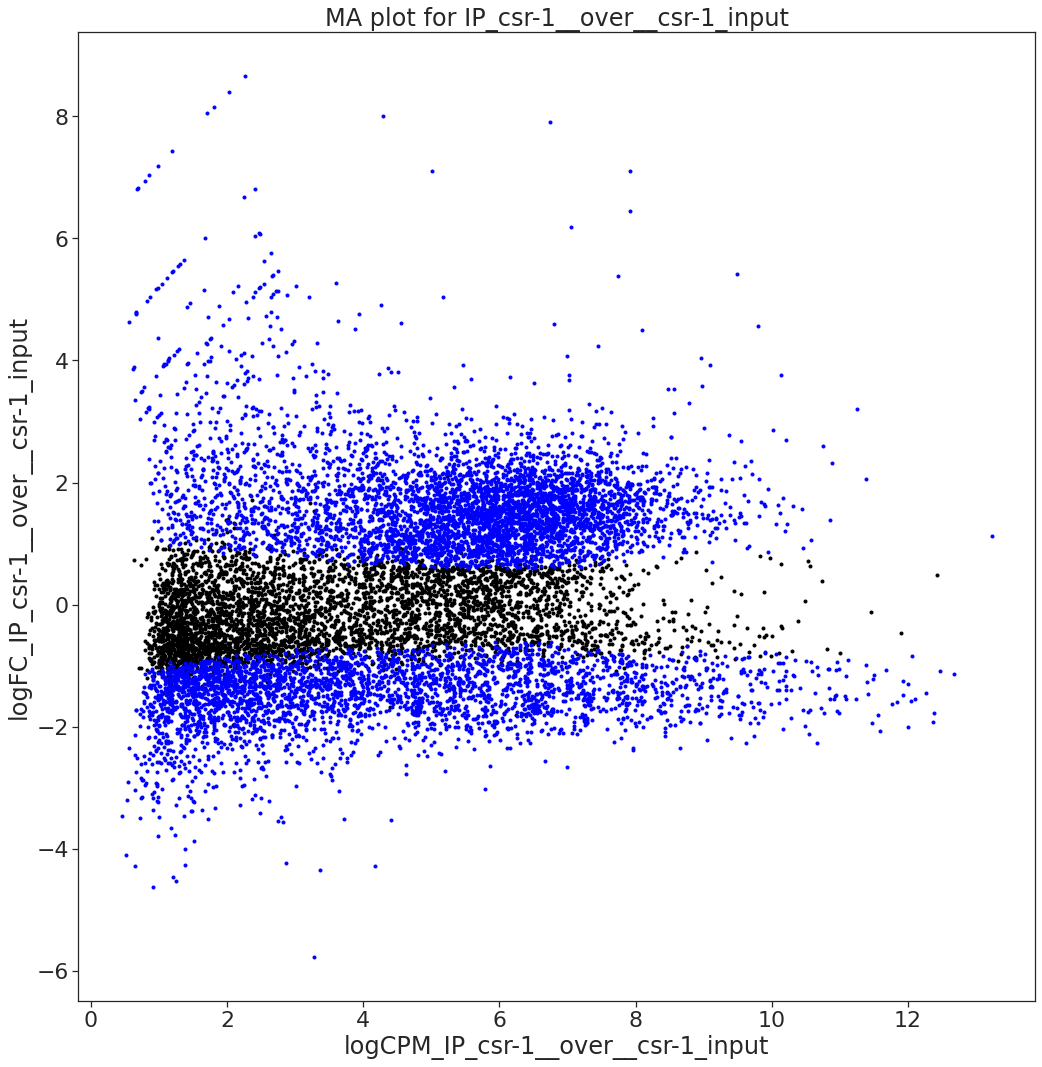

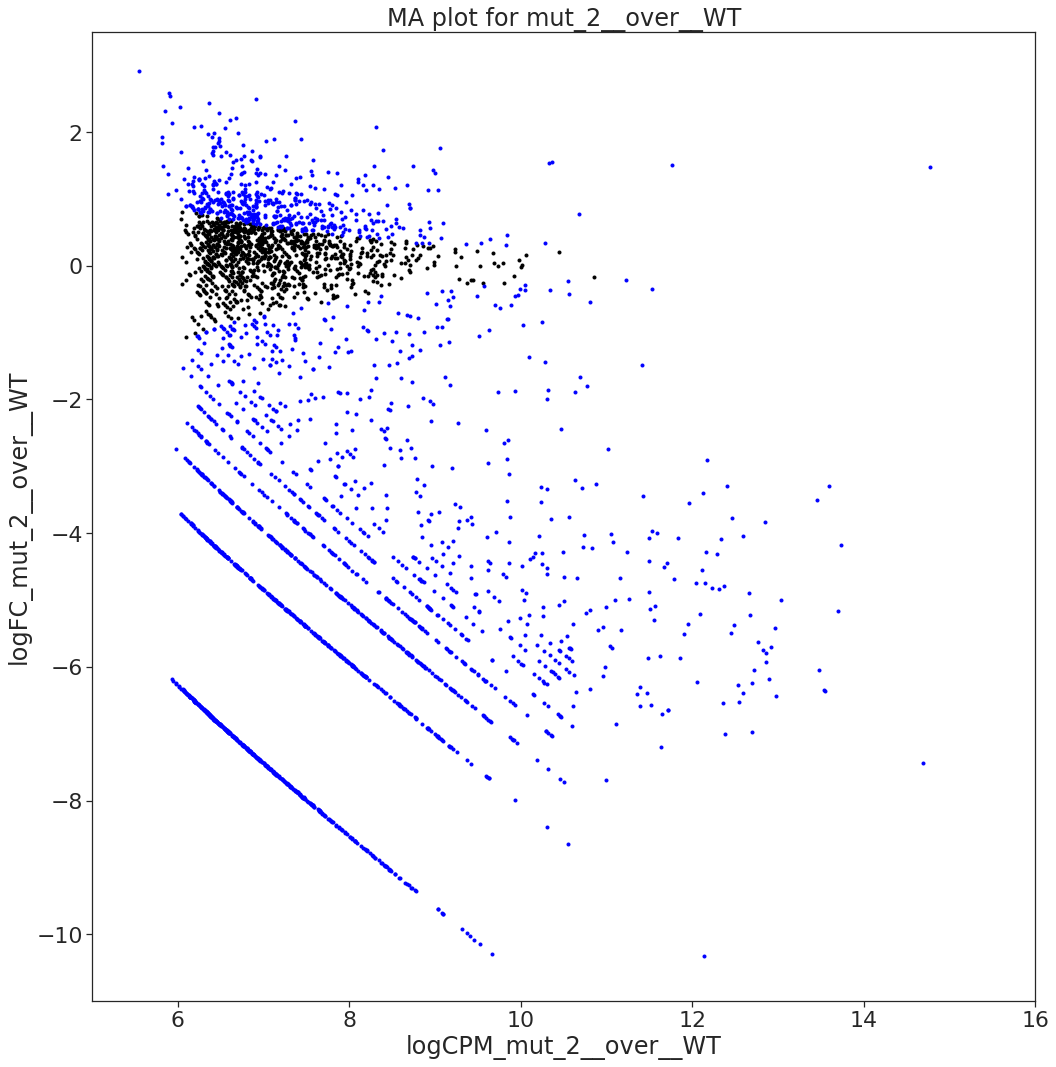

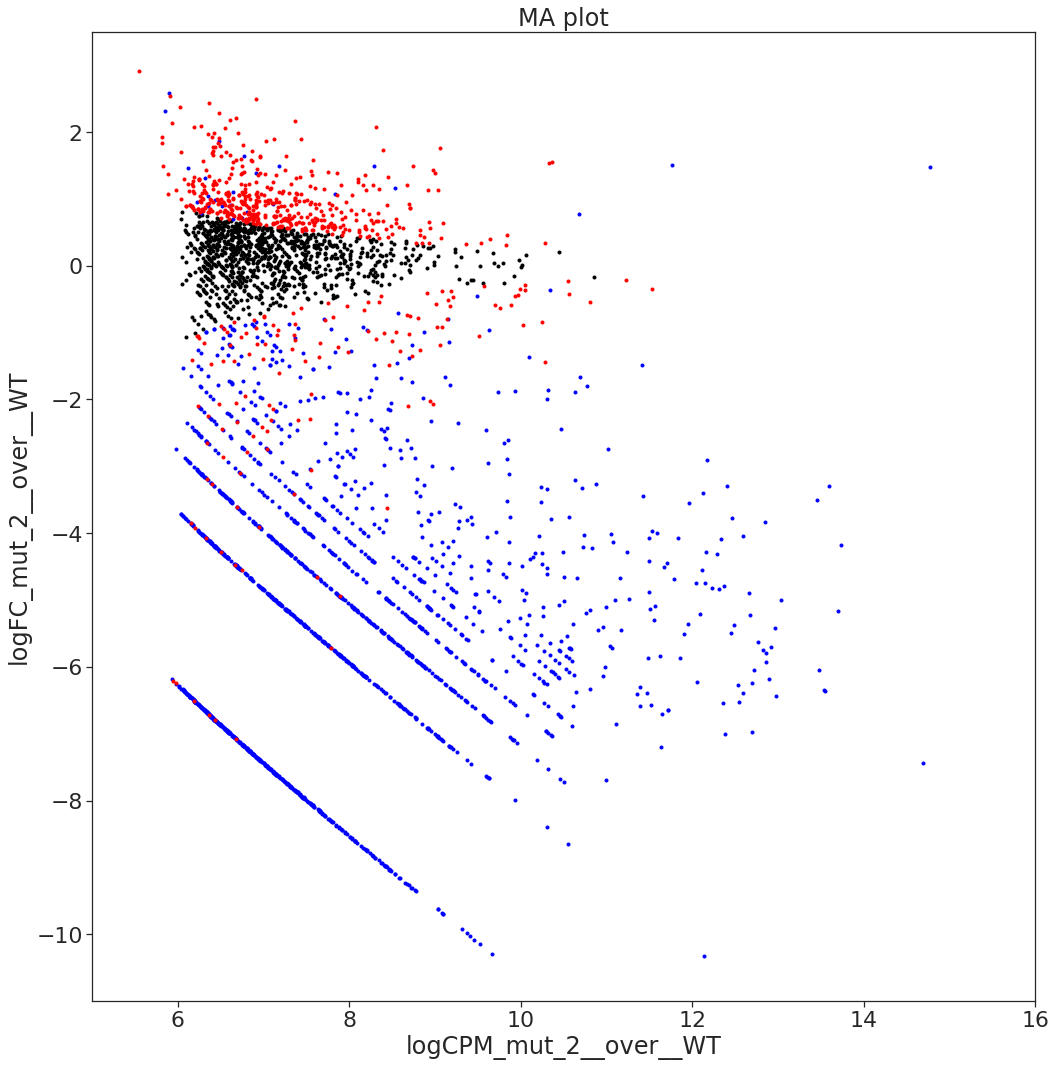

In [20]:
df_1_path = ip__csr_1_input__csr_1_IP_path
df_1_name = ip__csr_1_input__csr_1_IP_name

df_2_path = small_rna__WT__mut_2_path
df_2_name = small_rna__WT__mut_2_name

plot_merged_MA_plot(df_1_path, df_2_path, df_1_name, df_2_name)